# FLIGHT PRICE PREDICTION Scrapping
### Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -
    
    1. Time of purchase patterns (making sure last-minute purchases are expensive)
    
    2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales            and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.


#### 1. Data Collection: 
- Scrapped 1614 rows of data from website: Yatra.com and Makemytrip.com
- The number of columns are:

1. __Features:__
- Airline Name, 
- Date of Journey, 
- Source, 
- Destination, 
- Departure Time, 
- Arrival Time, 
- Duration, 
- Total Stops and 

2. __Target variable:__ 
- Price

#### 2. Data Analysis: 
- After cleaning the data, you have to do some analysis on the data. 
- Do airfares change frequently? 
- Do they move in small increments or in large jumps? 
- Do they tend to go up or down over time?
- What is the best time to buy so that the consumer can save the most by taking the least risk?
- Does price increase as we get near to departure date? 
- Is Indigo cheaper than Jet Airways? 
- Are morning flights expensive?

#### 3. Model Building: 
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select 
the bestmodel. Follow the complete life cycle of data science. Include all the steps like:
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import pickle

## Importing the DATASET

In [2]:
flight=pd.read_csv("flight_price_prediction")

## Checking Top 5 rows Data

In [3]:
flight.head()

,Unnamed: 0,Unnamed: 0.1,Airline_Name,Date_of Journey,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,0,0.0,SpiceJet,"Tue, Dec 13",New Delhi,Mumbai,18:55,21:05,2h 10m,Non Stop,"5,951"
1,1,1.0,SpiceJet,"Tue, Dec 13",New Delhi,Mumbai,19:45,22:05,2h 20m,Non Stop,"5,951"
2,2,2.0,Go First,"Tue, Dec 13",New Delhi,Mumbai,07:00,09:10,2h 10m,Non Stop,"5,953"
3,3,3.0,Go First,"Tue, Dec 13",New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,"5,953"
4,4,4.0,Go First,"Tue, Dec 13",New Delhi,Mumbai,15:00,17:15,2h 15m,Non Stop,"5,953"


# EDA

## Checking Total Numbers of Rows and Column

In [4]:
flight.shape

(1614, 11)

## Checking All Column Name

In [5]:
flight.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Airline_Name', 'Date_of Journey',
       'Source', 'Destination', 'Departure_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Price'],
      dtype='object')

## Checking Data Type of All Data

In [6]:
flight.dtypes

Unnamed: 0           int64
Unnamed: 0.1       float64
Airline_Name        object
Date_of Journey     object
Source              object
Destination         object
Departure_Time      object
Arrival_Time        object
Duration            object
Total_Stops         object
Price               object
dtype: object

## Checking for Null Values

In [7]:
flight.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1       211
Airline_Name         0
Date_of Journey      0
Source               0
Destination          0
Departure_Time       0
Arrival_Time         0
Duration             0
Total_Stops          0
Price                0
dtype: int64

### Checking for Null Values through heatmap

<AxesSubplot:>

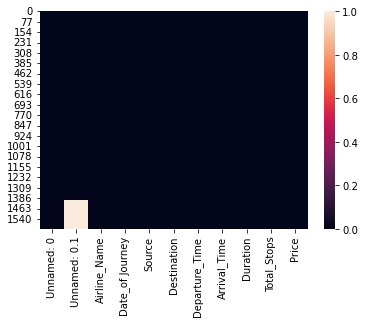

In [8]:
sns.heatmap(flight.isnull())

##### We can see there are NULL values in our Dataset in column, Unnamed: 0.1. So, we will delete this column and column, "Unnamed: 0" also as these column contains serial no.

### Checking if - values present in dataset or not

In [9]:
(flight=='-').sum()

Unnamed: 0         0
Unnamed: 0.1       0
Airline_Name       0
Date_of Journey    4
Source             0
Destination        0
Departure_Time     0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

## Checking total number of unique value in each column of Dataset

In [10]:
flight.nunique()

Unnamed: 0         1614
Unnamed: 0.1       1403
Airline_Name         20
Date_of Journey      37
Source                8
Destination          24
Departure_Time      235
Arrival_Time        257
Duration            278
Total_Stops          29
Price               298
dtype: int64

## Information about Data (Memory Used and Data Types)

In [11]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1614 non-null   int64  
 1   Unnamed: 0.1     1403 non-null   float64
 2   Airline_Name     1614 non-null   object 
 3   Date_of Journey  1614 non-null   object 
 4   Source           1614 non-null   object 
 5   Destination      1614 non-null   object 
 6   Departure_Time   1614 non-null   object 
 7   Arrival_Time     1614 non-null   object 
 8   Duration         1614 non-null   object 
 9   Total_Stops      1614 non-null   object 
 10  Price            1614 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 138.8+ KB


# Data Cleaning
### Handling Null Values

In [12]:
#dropping columns
flight.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)

In [13]:
#Renaming column 'Date_of Journey' name
flight.rename(columns = {"Date_of Journey":"Date_of_Journey"},inplace=True)

In [14]:
flight

,Airline_Name,Date_of_Journey,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,SpiceJet,"Tue, Dec 13",New Delhi,Mumbai,18:55,21:05,2h 10m,Non Stop,"5,951"
1,SpiceJet,"Tue, Dec 13",New Delhi,Mumbai,19:45,22:05,2h 20m,Non Stop,"5,951"
2,Go First,"Tue, Dec 13",New Delhi,Mumbai,07:00,09:10,2h 10m,Non Stop,"5,953"
3,Go First,"Tue, Dec 13",New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,"5,953"
4,Go First,"Tue, Dec 13",New Delhi,Mumbai,15:00,17:15,2h 15m,Non Stop,"5,953"
...,...,...,...,...,...,...,...,...,...
1609,Air India,"Fri, Sep 30",New Delhi,Tirupati,07:10,13:45,06 h 35 m,1 stop via Hyderabad,"₹ 10,680"
1610,Air India,"Fri, Sep 30",New Delhi,Tirupati,22:30,13:45,15 h 15 m,"2 stop via Mumbai,Hyderabad","₹ 13,095"
1611,Air India,"Fri, Sep 30",New Delhi,Tirupati,21:15,13:45,16 h 30 m,"2 stop via Mumbai,Hyderabad","₹ 13,095"
1612,Air India,"Fri, Sep 30",New Delhi,Tirupati,20:00,13:45,17 h 45 m,"2 stop via Mumbai,Hyderabad","₹ 13,305"


### Handling values "-" in column 'Date_of_Journey'

In [15]:
#checking all values of column 'Date_of_Journey'
flight['Date_of_Journey'].value_counts()

Wed, Sep 28    184
Thu, Nov 3     140
Tue, Oct 18    140
Thu, Sep 29    116
Mon, Sep 26     90
Fri, Oct 7      80
Sat, Nov 5      70
Mon, Oct 3      70
Sun, Nov 6      70
Tue, Dec 13     40
Fri, Nov 25     40
Sun, Oct 30     40
Tue, Oct 4      40
Wed, Oct 5      40
Sat, Oct 29     40
Wed, Nov 16     40
Mon, Oct 17     40
Sat, Oct 1      40
Sat, Nov 19     30
Fri, Sep 30     21
Fri, Oct 28     20
Thu, Oct 13     20
Thu, Sep 22     20
Sat, Dec 17     20
Wed, Oct 12     20
Tue, Oct 11     20
Wed, Nov 9      20
Sun, Nov 27     20
Tue, Nov 15     18
Fri, Dec 2      10
Thu, Dec 15     10
Tue, Sep 27     10
Sun, Sep 25     10
Sat, Oct 15     10
Mon, Oct 24     10
-                4
Thu, Nov 17      1
Name: Date_of_Journey, dtype: int64

In [16]:
#droping rows containing values "-"
flight.drop(flight.loc[flight['Date_of_Journey'] == "-"].index, inplace=True)

In [17]:
#Checking again "-" values in column 'Date_of_Journey' after droping
(flight=='-').sum()

Airline_Name       0
Date_of_Journey    0
Source             0
Destination        0
Departure_Time     0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [18]:
#Checking again "Null" values in dataset
flight.isnull().sum()

Airline_Name       0
Date_of_Journey    0
Source             0
Destination        0
Departure_Time     0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

#### Extracting "Day",  "Date" and "Month" from Column  'Date_of_Journey'

In [19]:
#converting into list for extraction
Journey_Date= flight['Date_of_Journey'].tolist()

In [20]:
#creating empty list
Day= []
date = []
Month = []
Date = []

In [21]:
#fetching data from 'Journey_Date'
for i in Journey_Date:
    Day.append(i.split(",")[0])
    date.append(i.split(",")[1])

In [22]:
#fetching data from 'date'
for i in date:
    Date.append(i.split(" ")[2])
    Month.append(i.split(" ")[1])

##### Creating new columns for extracted data and adding values

In [23]:
flight['Day']= Day

In [24]:
flight['Date']= Date

In [25]:
flight['Month']=Month

In [26]:
#checking dataset again
flight.head()

,Airline_Name,Date_of_Journey,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Date,Month
0,SpiceJet,"Tue, Dec 13",New Delhi,Mumbai,18:55,21:05,2h 10m,Non Stop,"5,951",Tue,13,Dec
1,SpiceJet,"Tue, Dec 13",New Delhi,Mumbai,19:45,22:05,2h 20m,Non Stop,"5,951",Tue,13,Dec
2,Go First,"Tue, Dec 13",New Delhi,Mumbai,07:00,09:10,2h 10m,Non Stop,"5,953",Tue,13,Dec
3,Go First,"Tue, Dec 13",New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,"5,953",Tue,13,Dec
4,Go First,"Tue, Dec 13",New Delhi,Mumbai,15:00,17:15,2h 15m,Non Stop,"5,953",Tue,13,Dec


In [27]:
#droping column 'Date_of_Journey' as it is not required now. We have extracted data from it
flight.drop(columns=['Date_of_Journey'], inplace= True)

In [28]:
#checking dataset again
flight.head()

,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Date,Month
0,SpiceJet,New Delhi,Mumbai,18:55,21:05,2h 10m,Non Stop,"5,951",Tue,13,Dec
1,SpiceJet,New Delhi,Mumbai,19:45,22:05,2h 20m,Non Stop,"5,951",Tue,13,Dec
2,Go First,New Delhi,Mumbai,07:00,09:10,2h 10m,Non Stop,"5,953",Tue,13,Dec
3,Go First,New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,"5,953",Tue,13,Dec
4,Go First,New Delhi,Mumbai,15:00,17:15,2h 15m,Non Stop,"5,953",Tue,13,Dec


### Column 'Departure_Time'

#### Extracting 'Departure_Hour' and 'Departure_Minute' from Column 'Departure_Time'

In [29]:
# Extracting Hours
flight["Departure_Hour"] = pd.to_datetime(flight["Departure_Time"]).dt.hour

# Extracting Minutes
flight["Departure_Minute"] = pd.to_datetime(flight["Departure_Time"]).dt.minute

#### Droping column 'Departure_Time' after extraction

In [30]:
#droping column 'Departure_Time' as it is not required now. We have extracted data from it
flight.drop(["Departure_Time"], axis = 1, inplace = True)

### Column 'Arrival_Time'

In [31]:
#Driven_KiloMeters column:
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace('\n', '')
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace('+', '')
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace(' ', '')
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace('1', '')
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace('day', '')

In [32]:
flight['Arrival_Time'] = flight['Arrival_Time'].replace({':20':'0:20','8:5':'8:50','2:5':'2:50','7:5':'7:50','Dec 05':'Sun, Dec 5','Dec 06':'Mon, Dec 6','Dec 07':'Tue, Dec 7'})

In [33]:
flight['Arrival_Time'] = flight['Arrival_Time'].replace({':20':'0:20','8:5':'08:50','2:5':'02:50','7:5':'07:50',':25':'00:25','0:0':'00:00','04:5':'04:50',
                                                        '07:0':'07:00','2:0':'02:00','2:5':'02:50','07:5':'07:50',':55':'00:55','08:0':'08:00','08:5':'08:50',
                                                         ':0':'00:00','4:0':'04:00','3:0':'03:00','8:0':'08:00','0:5':'00:50',':50':'00:50','00:5':'00:50','22:5':'22:50',
                                                         '5:0':'05:00','00:0':'00:00','23:0':'23:00','09:0':'09:00',':45':'00:45','5:00':'05:00','4:00':'04:00','9:05':'09:05',
                                                         '8:20':'08:20','2:45':'02:45', '7:05':'07:05', '2:20':'02:20', '5:20':'05:20',':05':'00:05', '9:20':'09:20',
                                                        '8:45':'08:45','7:55':'07:55','6:5':'06:50','09:5':'09:50','3:35':'03:35','3:40':'03:40','06:5':'06:50',':40':'00:40',
                                                         '8:55':'08:55','3:30':'03:30', '6:00':'06:00', '4:30':'04:30', '0:50':'00:50','9:55':'09:55', '23:5':'23:50', 
                                                        '2:40':'02:40', '0:20':'00:20', '4:45':'0:45', '2:05':'02:05', '2:25':'02:25', '0:55':'00:55', '2:50':'02:50', '8:25':'08:25', 
                                                         '20:5':'20:50', '9:45':'09:45', '5:50':'05:50', '7:45':'07:45', '0:40':'00:40', '0:30':'00:30', '5:40':'05:40', '22:0':'22:00', 
                                                         '6:55':'06:55', '8:05':'08:05', '7:25':'07:25', '9:35':'09:35', '0:35':'00:35', '6:30':'06:30', '3:20':'03:20', '3:55':'03:55',
                                                        '03:5':'03:50', '6:40':'06:40', '9:40':'09:40', '3:00':'03:00', ':00':'00:00', '5:45':'05:45', '6:35':'06:35', '5:5':'05:50', 
                                                         '3:50':'03:50', '02:0':'02:00', '7:0':'07:00', '5:30':'05:30', '06:0':'06:00', '8:50':'08:50', '8:40':'08:40', '7:20':'07:20', 
                                                         '6:05':'06:05', '9:0':'09:00', '6:45':'06:45', '04:0':'04:00', '20:0':'20:00', '05:5':'05:50', '9:5':'09:50', '3:5':'03:50' })

In [34]:
# Extracting Hours
flight["Arrival_Hour"] = pd.to_datetime(flight["Arrival_Time"]).dt.hour

# Extracting Minutes
flight["Arrival_Minute"] = pd.to_datetime(flight["Arrival_Time"]).dt.minute

#### Droping Arrival_Time after extraction

In [35]:
flight.drop(["Arrival_Time"], axis = 1, inplace = True)

In [36]:
#checking dataset again
flight.head()

,Airline_Name,Source,Destination,Duration,Total_Stops,Price,Day,Date,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,SpiceJet,New Delhi,Mumbai,2h 10m,Non Stop,"5,951",Tue,13,Dec,18,55,2,5
1,SpiceJet,New Delhi,Mumbai,2h 20m,Non Stop,"5,951",Tue,13,Dec,19,45,22,5
2,Go First,New Delhi,Mumbai,2h 10m,Non Stop,"5,953",Tue,13,Dec,7,0,9,0
3,Go First,New Delhi,Mumbai,2h 10m,Non Stop,"5,953",Tue,13,Dec,8,0,0,0
4,Go First,New Delhi,Mumbai,2h 15m,Non Stop,"5,953",Tue,13,Dec,15,0,7,50


#### Column Duration

In [37]:
flight["Duration"].unique()

array(['2h 10m', '2h 20m', '2h 15m', '4h 45m', '2h 35m', '2h 30m',
       '2h 45m', '2h 50m', '2h 55m', '4h 00m', '2h 40m', '5h 45m',
       '7h 15m', '4h 15m', '7h 20m', '9h 45m', '12h 30m', '19h 55m',
       '20h 05m', '3h 00m', '3h 15m', '2h 25m', '2h 05m', '1h 55m',
       '1h 35m', '1h 30m', '1h 40m', '1h 20m', '1h 25m', '2h 00m',
       '1h 50m', '1h 45m', '24h 20m', '5h 15m', '24h 55m', '16h 00m',
       '16h 50m', '17h 50m', '19h 00m', '20h 15m', '21h 10m', '23h 00m',
       '24h 05m', '19h 30m', '20h 20m', '21h 20m', '22h 30m', '23h 45m',
       '24h 40m', '8h 20m', '8h 50m', '9h 00m', '9h 30m', '4h 50m',
       '3h 45m', '11h 20m', '11h 50m', '5h 40m', '6h 55m', '7h 50m',
       '4h 30m', '5h 30m', '6h 10m', '6h 20m', '6h 25m', '7h 10m',
       '7h 40m', '8h 00m', '8h 15m', '9h 25m', '9h 55m', '10h 05m',
       '10h 10m', '10h 35m', '10h 40m', '1h 15m', '3h 05m', '4h 40m',
       '4h 55m', '5h 20m', '5h 50m', '5h 55m', '6h 30m', '7h 05m',
       '7h 25m', '7h 55m', '8h 40m', 

In [38]:
flight["Duration"]= flight["Duration"].str.replace(' h', 'h')
flight["Duration"]= flight["Duration"].str.replace(' m', 'm')

In [39]:
flight["Duration"].unique()

array(['2h 10m', '2h 20m', '2h 15m', '4h 45m', '2h 35m', '2h 30m',
       '2h 45m', '2h 50m', '2h 55m', '4h 00m', '2h 40m', '5h 45m',
       '7h 15m', '4h 15m', '7h 20m', '9h 45m', '12h 30m', '19h 55m',
       '20h 05m', '3h 00m', '3h 15m', '2h 25m', '2h 05m', '1h 55m',
       '1h 35m', '1h 30m', '1h 40m', '1h 20m', '1h 25m', '2h 00m',
       '1h 50m', '1h 45m', '24h 20m', '5h 15m', '24h 55m', '16h 00m',
       '16h 50m', '17h 50m', '19h 00m', '20h 15m', '21h 10m', '23h 00m',
       '24h 05m', '19h 30m', '20h 20m', '21h 20m', '22h 30m', '23h 45m',
       '24h 40m', '8h 20m', '8h 50m', '9h 00m', '9h 30m', '4h 50m',
       '3h 45m', '11h 20m', '11h 50m', '5h 40m', '6h 55m', '7h 50m',
       '4h 30m', '5h 30m', '6h 10m', '6h 20m', '6h 25m', '7h 10m',
       '7h 40m', '8h 00m', '8h 15m', '9h 25m', '9h 55m', '10h 05m',
       '10h 10m', '10h 35m', '10h 40m', '1h 15m', '3h 05m', '4h 40m',
       '4h 55m', '5h 20m', '5h 50m', '5h 55m', '6h 30m', '7h 05m',
       '7h 25m', '7h 55m', '8h 40m', 

### Converting and Extracting Duration column into list

In [40]:
# Time taken by plane to reach destination is called Duration (Duration= Departure Time - Arrival time).
duration = list(flight["Duration"])

for i in range(len(duration)):
    # Checking if duration contains only hour or minutes
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            # Adding 0 Minutes
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adding 0 Hours
            duration[i] = "0h " + duration[i]


In [41]:
Duration_Hours = []
for i in range(len(duration)):
    # Extracting hours from duration
    Duration_Hours.append(int(duration[i].split(sep = "h")[0]))    

In [42]:
Duration_Minutes = []
for i in range(len(duration)):
    # Extracting minutes from duration
    Duration_Minutes.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [43]:
# Adding Duration_Hours and Duration_Minutes list to flight_train Dataset
flight["Duration_Hours"] = Duration_Hours
flight["Duration_Minutes"] = Duration_Minutes

#### Droping Duration column after extraction

In [44]:
flight.drop(["Duration"], axis = 1, inplace = True)

In [45]:
flight.head()

,Airline_Name,Source,Destination,Total_Stops,Price,Day,Date,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,SpiceJet,New Delhi,Mumbai,Non Stop,"5,951",Tue,13,Dec,18,55,2,5,2,10
1,SpiceJet,New Delhi,Mumbai,Non Stop,"5,951",Tue,13,Dec,19,45,22,5,2,20
2,Go First,New Delhi,Mumbai,Non Stop,"5,953",Tue,13,Dec,7,0,9,0,2,10
3,Go First,New Delhi,Mumbai,Non Stop,"5,953",Tue,13,Dec,8,0,0,0,2,10
4,Go First,New Delhi,Mumbai,Non Stop,"5,953",Tue,13,Dec,15,0,7,50,2,15


#### Column 'Price'

In [46]:
flight['Price'].unique()

array(['5,951', '5,953', '5,954', '6,583', '7,003', '7,005', '7,321',
       '7,423', '7,424', '7,421', '8,369', '8,474', '8,580', '8,683',
       '8,947', '9,419', '7,217', '7,425', '7,635', '7,684', '5,955',
       '6,111', '6,164', '6,269', '6,165', '6,374', '6,480', '4,272',
       '4,274', '4,275', '4,589', '4,692', '5,952', '5,114', '5,219',
       '5,429', '5,743', '4,800', '4,957', '6,689', '8,022', '9,367',
       '11,067', '5,838', '5,942', '5,943', '5,940', '5,941', '7,663',
       '1,998', '2,145', '2,355', '2,721', '2,826', '7,412', '7,413',
       '7,570', '7,623', '7,728', '7,938', '6,487', '7,560', '2,436',
       '2,646', '3,339', '3,347', '3,399', '3,915', '3,924', '3,066',
       '3,592', '3,839', '4,311', '4,836', '5,376', '5,102', '5,103',
       '5,104', '5,260', '5,418', '5,524', '5,628', '5,891', '1,945',
       '2,545', '2,671', '2,678', '6,874', '7,364', '7,368', '7,682',
       '5,374', '2,497', '2,797', '2,855', '2,865', '2,960', '2,991',
       '3,170', '3,

In [47]:
#Removing irrelevant Values and special characters
flight['Price']= flight['Price'].str.replace(' Deal', '')
flight['Price']= flight['Price'].str.replace('₹ 35,254', '')
flight['Price']= flight['Price'].str.replace('₹ 17,174', '')
flight['Price']= flight['Price'].str.replace('₹ 18,624', '')
flight['Price']= flight['Price'].str.replace('₹ 15,270', '')
flight['Price']= flight['Price'].str.replace('₹ 11,177', '')
flight['Price']= flight['Price'].str.replace(',', '')
flight['Price']= flight['Price'].str.replace('₹ ', '')

In [48]:
#checking again all values after removing special characters
flight['Price'].unique()

array(['5951', '5953', '5954', '6583', '7003', '7005', '7321', '7423',
       '7424', '7421', '8369', '8474', '8580', '8683', '8947', '9419',
       '7217', '7425', '7635', '7684', '5955', '6111', '6164', '6269',
       '6165', '6374', '6480', '4272', '4274', '4275', '4589', '4692',
       '5952', '5114', '5219', '5429', '5743', '4800', '4957', '6689',
       '8022', '9367', '11067', '5838', '5942', '5943', '5940', '5941',
       '7663', '1998', '2145', '2355', '2721', '2826', '7412', '7413',
       '7570', '7623', '7728', '7938', '6487', '7560', '2436', '2646',
       '3339', '3347', '3399', '3915', '3924', '3066', '3592', '3839',
       '4311', '4836', '5376', '5102', '5103', '5104', '5260', '5418',
       '5524', '5628', '5891', '1945', '2545', '2671', '2678', '6874',
       '7364', '7368', '7682', '5374', '2497', '2797', '2855', '2865',
       '2960', '2991', '3170', '3300', '3323', '7576', '7579', '7685',
       '7885', '7890', '7894', '7927', '7968', '8105', '8201', '4530',
     

In [49]:
flight

,Airline_Name,Source,Destination,Total_Stops,Price,Day,Date,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,SpiceJet,New Delhi,Mumbai,Non Stop,5951,Tue,13,Dec,18,55,2,5,2,10
1,SpiceJet,New Delhi,Mumbai,Non Stop,5951,Tue,13,Dec,19,45,22,5,2,20
2,Go First,New Delhi,Mumbai,Non Stop,5953,Tue,13,Dec,7,0,9,0,2,10
3,Go First,New Delhi,Mumbai,Non Stop,5953,Tue,13,Dec,8,0,0,0,2,10
4,Go First,New Delhi,Mumbai,Non Stop,5953,Tue,13,Dec,15,0,7,50,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,Air India,New Delhi,Tirupati,1 stop via Hyderabad,10680,Fri,30,Sep,7,10,3,45,6,35
1610,Air India,New Delhi,Tirupati,"2 stop via Mumbai,Hyderabad",13095,Fri,30,Sep,22,30,3,45,15,15
1611,Air India,New Delhi,Tirupati,"2 stop via Mumbai,Hyderabad",13095,Fri,30,Sep,21,15,3,45,16,30
1612,Air India,New Delhi,Tirupati,"2 stop via Mumbai,Hyderabad",13305,Fri,30,Sep,20,0,3,45,17,45


#### Column 'Total_Stops'

In [50]:
flight['Total_Stops'].unique()

array(['0', '1', '2', '1viaVisakhapatnam', '1viaMumbai', '1viaPune',
       '1viaLucknow', '1viaIndore', '1viaGoa', '1viaGuwahati',
       '1viaBengaluru', '1viaKochi', '1viaColombo',
       '2viaChandigarh,Mumbai', '1viaBahrain', '1viaDubai',
       '1viaSingapore', '2viaMumbai,Dubai', '2viaAhmedabad,Dubai',
       '1viaIstanbul', '1viaDoha', '1viaZurich', '1viaAbuDhabi',
       '2viaAbuDhabi,Colombo', '1viaHyderabad', '1viaNewDelhi',
       '1viaAhmedabad', '2viaMumbai,Hyderabad'], dtype=object)

In [51]:
#Removing irrelevant Values and special characters
flight["Total_Stops"]= flight["Total_Stops"].str.replace('Non', '0')
flight["Total_Stops"]= flight["Total_Stops"].str.replace('Stop', '')
flight["Total_Stops"]= flight["Total_Stops"].str.replace('stop', '')
flight["Total_Stops"]= flight["Total_Stops"].str.replace(' ', '')
flight["Total_Stops"]= flight["Total_Stops"].str.replace('(', '')
flight["Total_Stops"]= flight["Total_Stops"].str.replace(')', '')
flight["Total_Stops"]= flight["Total_Stops"].str.replace('2s', '2')

In [52]:
Stops1 = flight['Total_Stops'].tolist() 

In [53]:
Total_Stops1 = []
for i in Stops1:
    # Extracting all stops from Total_Stops
    Total_Stops1.append(i.split(sep ="via")[0]) 

In [54]:
flight['Total_Stops'] = Total_Stops1

In [55]:
flight['Total_Stops'].unique()

array(['0', '1', '2'], dtype=object)

In [56]:
flight.head()

,Unnamed: 0,Unnamed: 0.1,Airline_Name,Date_of Journey,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,0,0.0,SpiceJet,"Tue, Dec 13",New Delhi,Mumbai,18:55,21:05,2h 10m,0,"5,951"
1,1,1.0,SpiceJet,"Tue, Dec 13",New Delhi,Mumbai,19:45,22:05,2h 20m,0,"5,951"
2,2,2.0,Go First,"Tue, Dec 13",New Delhi,Mumbai,07:00,09:10,2h 10m,0,"5,953"
3,3,3.0,Go First,"Tue, Dec 13",New Delhi,Mumbai,08:00,10:10,2h 10m,0,"5,953"
4,4,4.0,Go First,"Tue, Dec 13",New Delhi,Mumbai,15:00,17:15,2h 15m,0,"5,953"


#### Converting datatypes from object to integer

In [59]:
flight['Total_Stops']= flight['Total_Stops'].astype('int64')

In [60]:
flight['Price']= flight['Price'].astype('int64')

In [61]:
flight['Date']= flight['Date'].astype('int64')

In [62]:
#checking Datatypes
flight.dtypes

Airline_Name        object
Source              object
Destination         object
Total_Stops          int64
Price                int64
Day                 object
Date                 int64
Month               object
Departure_Hour       int64
Departure_Minute     int64
Arrival_Hour         int64
Arrival_Minute       int64
Duration_Hours       int64
Duration_Minutes     int64
dtype: object

In [63]:
#checking again all column names
flight.columns

Index(['Airline_Name', 'Source', 'Destination', 'Total_Stops', 'Price', 'Day',
       'Date', 'Month', 'Departure_Hour', 'Departure_Minute', 'Arrival_Hour',
       'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

In [64]:
#Checking again total Rows and Columns
flight.shape

(1610, 14)

# Descriptive Statistics

In [65]:
# Description of flight Dataset : works only on continuous column 
flight.describe()

,Total_Stops,Price,Date,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,0.340994,8804.907453,16.324845,12.830435,26.888199,7.444099,30.568323,4.698137,26.388199
std,0.495972,14342.189168,10.213236,6.213455,18.214417,7.094649,18.778003,5.699176,17.488741
min,0.000000,957.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5114.000000,5.000000,7.000000,10.000000,2.000000,20.000000,2.000000,10.000000
50%,0.000000,5955.000000,17.000000,13.000000,30.000000,6.000000,35.000000,2.000000,25.000000
75%,1.000000,7560.000000,28.000000,18.000000,45.000000,9.000000,50.000000,6.000000,40.000000
max,2.000000,133695.000000,30.000000,23.000000,55.000000,23.000000,55.000000,32.000000,55.000000


We can see that 9 column are containing continuous data and 5 column contains categorical data

### Checking Description through heatmap

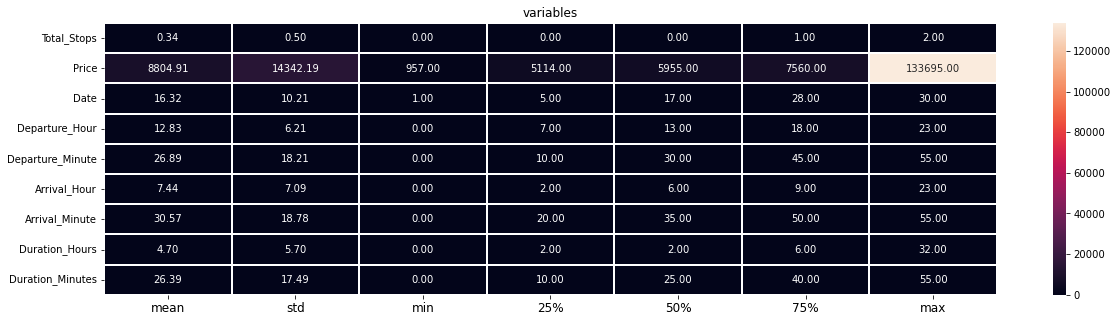

In [66]:
plt.figure(figsize=(20,5))
sns.heatmap(round(flight.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

#### Observation of Describe of Datasets:
- The summary of this dataset shows that there are no negative value present.
- We can see the counts of all continuous columns are 1610.000000 which means no null values are present.
- Total No of Rows: 1610 and Total No. of Columns: 14
- Only 9 column contains Continuous Data, they are: Total_Stops, Price, Date, Departure_Hour, Departure_Minute, Arrival_Hour, Arrival_Minute, Duration_Hours, Duration_Minutes
- We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column.
- We can see in 'Total_Stops' columns 'standard deviation' is more than it's 'mean' which means there are outliers and skewness present in column.
- We can also see that there are huge differences between 25%, 50% and 75% deviation which shows skewness. 

# Data Visualization
## Univariate Analysis
### Using Countplot

IndiGo                           692
Vistara                          218
Air Asia                         177
Go First                         171
Air India                        138
SpiceJet                         113
Alliance Air                      21
Emirates                          20
AirAsia                           19
Qatar Airways                     12
Vistara, Emirates                  8
Singapore Airlines                 4
Gulf Air                           3
Etihad Airways                     3
flydubai                           2
Srilankan Airlines                 2
Turkish Airlines                   2
FlyBig                             2
Air India, Singapore Airlines      2
Swiss                              1
Name: Airline_Name, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Airline_Name'>

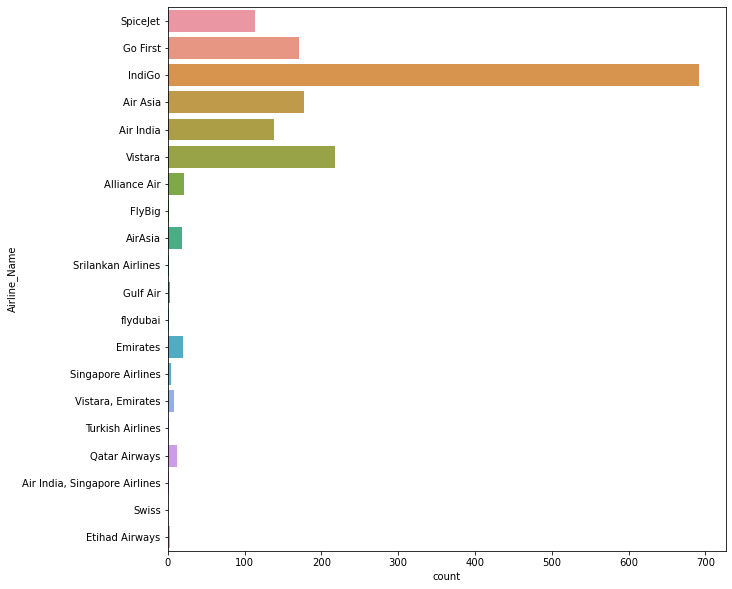

In [67]:
#Count Plot for "Airline_Name" column
print(flight["Airline_Name"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(y= "Airline_Name",data=flight)

##### We observe that 'IndiGo' Airlines flights are taken most (Total No= 692) and 'Swiss' Airlines is least (Total No= 1).

New Delhi    736
Mumbai       276
Bangalore    270
Hyderabad    152
Kolkata      133
Jaipur        31
Pune           8
Agra           4
Name: Source, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Source'>

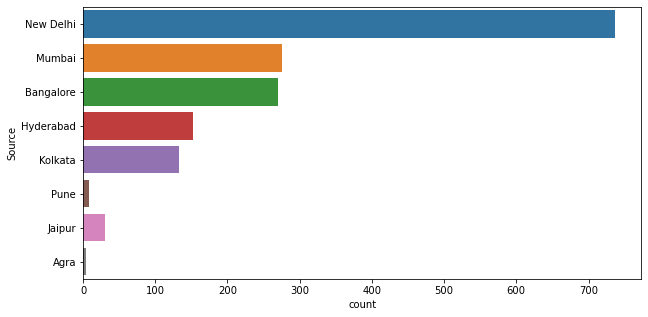

In [68]:
#Count Plot for "Source" column
print(flight["Source"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(y= "Source",data=flight)

##### We observe that from 'New Delhi'  as Source, flights are taken off most (Total No= 736) and 'Agra'  is least (Total No= 4).

Chennai          162
Kolkata          132
Mumbai           130
New Delhi        125
Bangalore        112
Pune             107
Goa              104
Hyderabad         98
Male              93
Jaipur            71
Bengaluru         65
Srinagar          54
Ahmedabad         50
Kochi             43
Varanasi          42
Dehradun          40
Patna             36
Leh               34
Guwahati          33
Tirupati          29
Chandigarh        26
Port Blair         9
Bagdogra           8
Visakhapatnam      7
Name: Destination, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Destination'>

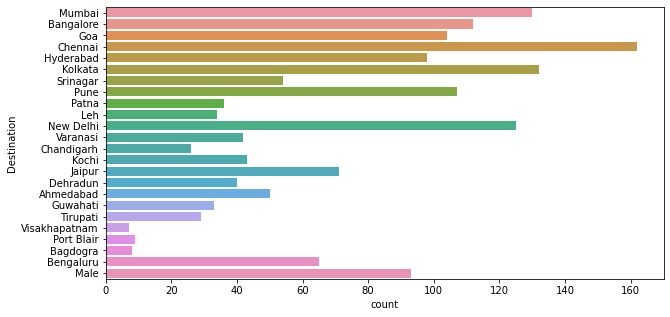

In [69]:
#Count Plot for "Destination" column
print(flight["Destination"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(y="Destination",data=flight)

##### We observe that 'Chennai' as Destination is taken most (Total No= 162) and 'Visakhapatnam' is least (Total No= 7).

0    1078
1     515
2      17
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

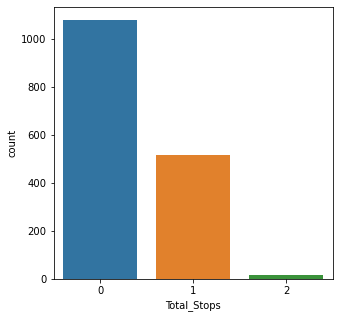

In [70]:
#Count Plot for "Total_Stops" column
print(flight["Total_Stops"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Total_Stops",data=flight)

##### Flights with No Stops is most (Total No= 1078) and with 2 Stops is least (Total No= 17).

Thu    307
Wed    304
Tue    268
Sat    210
Mon    210
Fri    171
Sun    140
Name: Day, dtype: int64


<AxesSubplot:xlabel='Day', ylabel='count'>

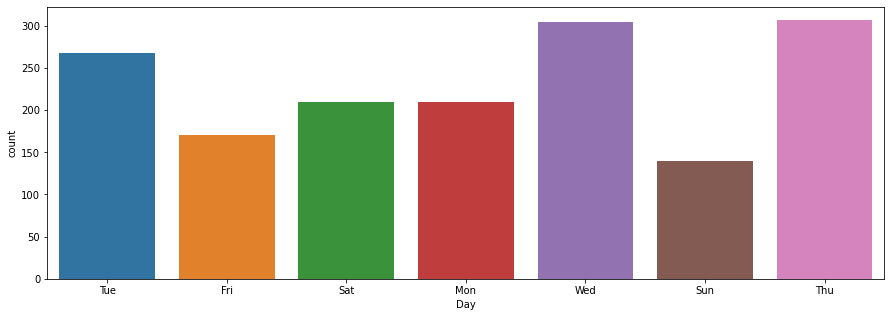

In [71]:
#countplot for "Day_of_Journey" column
print(flight["Day"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Day",data=flight)

##### On day 'Thursday' most flights are available (Total No= 307) and on 'Sunday' least (Total No= 140).

3     210
28    204
29    156
18    140
5     110
26     90
7      80
6      70
17     61
30     61
13     60
25     50
4      40
16     40
1      40
15     38
27     30
19     30
12     20
9      20
11     20
22     20
24     10
2      10
Name: Date, dtype: int64


<AxesSubplot:xlabel='Date', ylabel='count'>

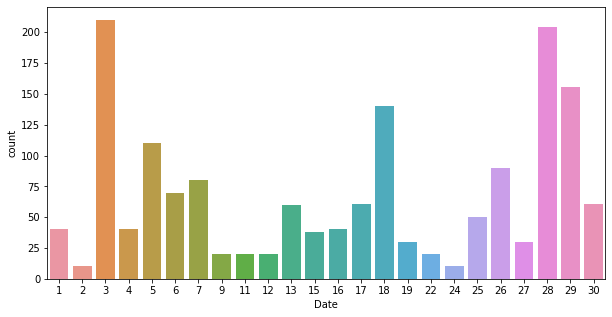

In [72]:
#countplot for "Month_of_Journey" column
print(flight["Date"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="Date",data=flight)

##### On date '3' most flights was taken (Total No= 210) and least on date '2'.

Oct    630
Sep    451
Nov    449
Dec     80
Name: Month, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='count'>

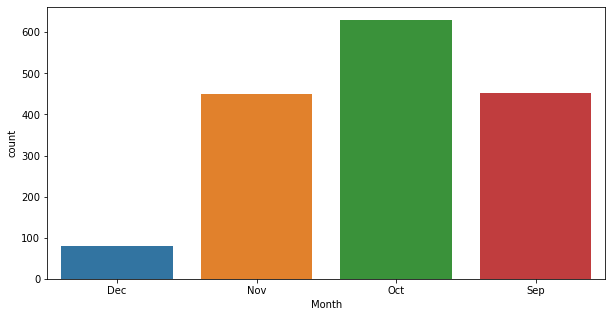

In [73]:
#countplot for "Month_of_Journey" column
print(flight["Month"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="Month",data=flight)

##### In month 'Oct', flights are available most (Total No= 630) and in 'Dec', least flight are available (Total No= 80).

6     121
7     119
21    117
8     107
5     100
20     98
18     97
17     95
9      92
19     81
15     74
22     71
16     66
10     60
11     46
13     45
14     44
12     43
4      42
23     35
0      20
2      16
1      11
3      10
Name: Departure_Hour, dtype: int64


<AxesSubplot:xlabel='Departure_Hour', ylabel='count'>

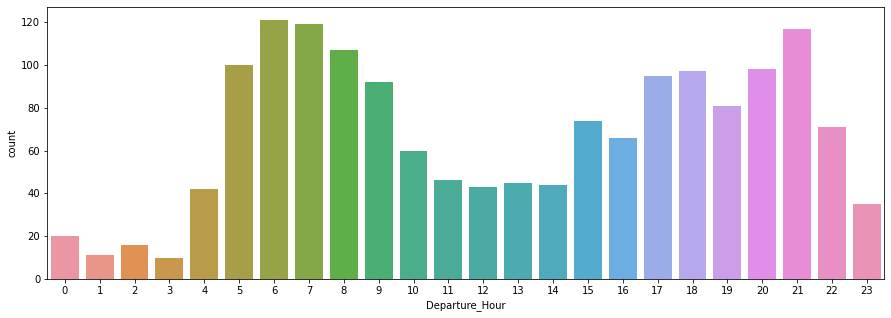

In [74]:
#countplot for "Dep_Hour" column
print(flight["Departure_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Departure_Hour",data=flight)

##### At '6 AM' mostly flights are departed (Total No= 121) and at '3 AM' least flights are departed (Total No= 10).

0     228
30    183
45    177
55    172
10    127
15    115
20    115
35    111
40    104
25    100
5      97
50     81
Name: Departure_Minute, dtype: int64


<AxesSubplot:xlabel='Departure_Minute', ylabel='count'>

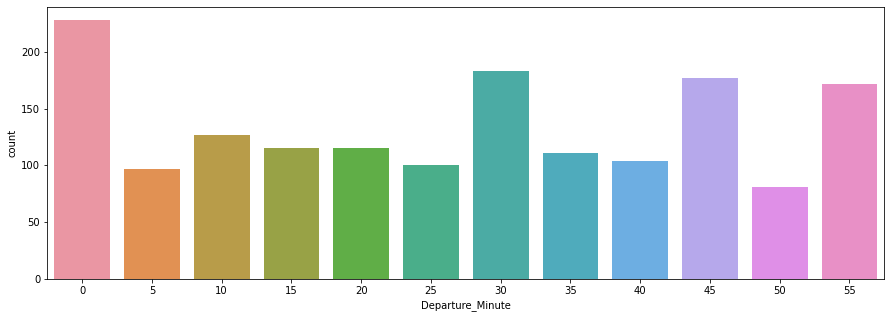

In [75]:
#countplot for "Dep_Minute" column
print(flight["Departure_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Departure_Minute",data=flight)

##### At '0' Minute, most flight have departed (Total No= 228) and at '50' Minute least flight have departed (Total No= 81).

0     298
2     196
8     184
7     183
9     162
6     104
20    100
22     93
23     82
3      74
5      68
4      66
Name: Arrival_Hour, dtype: int64


<AxesSubplot:xlabel='Arrival_Hour', ylabel='count'>

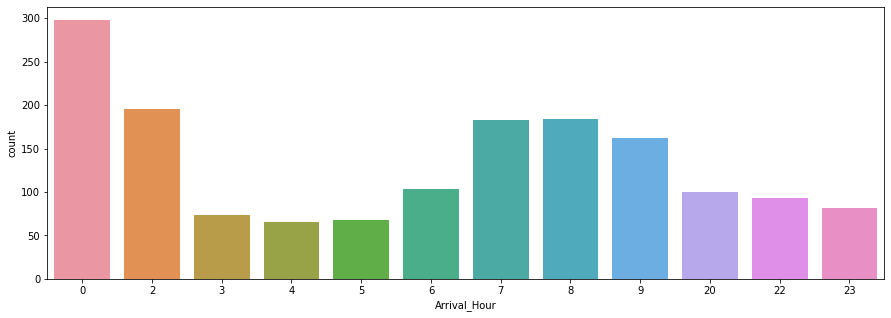

In [76]:
#countplot for "Arrival_Hour" column
print(flight["Arrival_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Arrival_Hour",data=flight)

##### At '12 AM' most flights have arrived at Destination (Total No= 298) and at '4 AM' least flights have arrived at Destination (Total No= 66).

50    301
0     228
40    156
45    151
5     150
25    138
20    135
55    127
30    119
35    105
Name: Arrival_Minute, dtype: int64


<AxesSubplot:xlabel='Arrival_Minute', ylabel='count'>

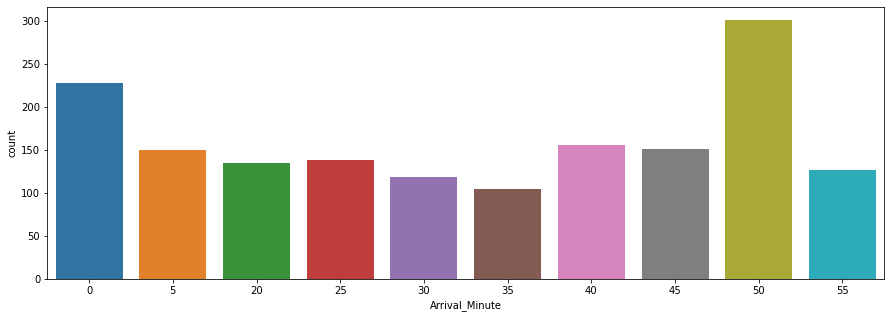

In [77]:
#countplot for "Arrival_Minute" column
print(flight["Arrival_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Arrival_Minute",data=flight)

##### At '50 Minute' most flights have arrived (Total No= 301) and at '35 Minute' least flights have arrived (Total No= 105).

2     666
1     380
9      54
8      53
7      49
6      49
3      47
5      43
10     39
4      39
11     19
16     15
17     15
20     15
12     15
24     14
15     14
19     11
22      9
23      9
21      9
14      9
13      7
18      7
27      6
28      5
0       4
26      2
25      2
30      2
32      1
31      1
Name: Duration_Hours, dtype: int64


<AxesSubplot:xlabel='Duration_Hours', ylabel='count'>

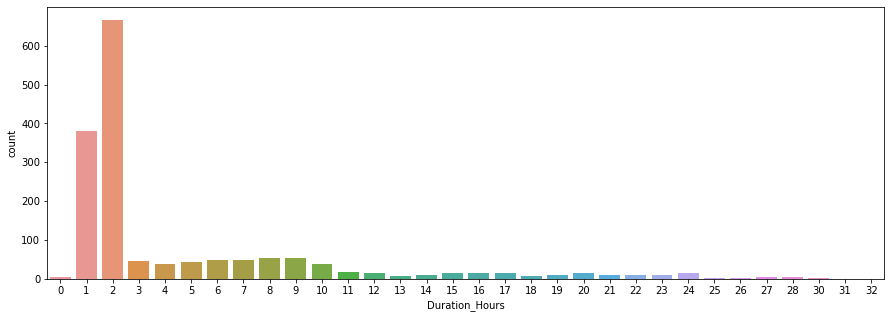

In [78]:
#countplot for "Duration_Hours" column
print(flight["Duration_Hours"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Duration_Hours",data=flight)

##### Mostly '2 hour' is taken by flights to reach at Destination from Source (Total No= 666) and least is '31 & 32 hour' (Total No= 1).

15    222
10    178
5     157
50    151
55    140
20    132
40    122
45    111
30    109
0     101
25     99
35     88
Name: Duration_Minutes, dtype: int64


<AxesSubplot:xlabel='Duration_Minutes', ylabel='count'>

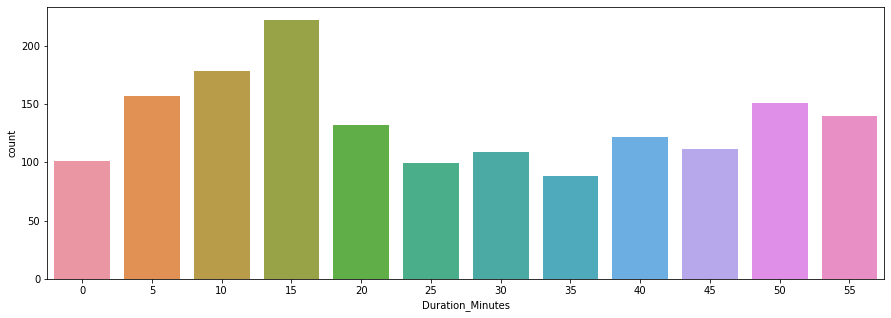

In [79]:
#countplot for "Duration_Minutes" column
print(flight["Duration_Minutes"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Duration_Minutes",data=flight)

##### Mostly '15 Minute' is taken by flights to reach at Destination from Source (Total No= 222) and least is '35 Minute' (Total No= 88).

### HistPlot

5954     128
4687      49
5374      46
7424      41
5891      40
        ... 
7854       1
11922      1
11542      1
5642       1
13830      1
Name: Price, Length: 294, dtype: int64


<AxesSubplot:xlabel='Price', ylabel='Count'>

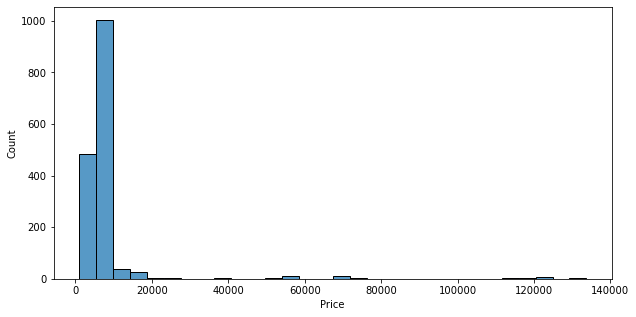

In [80]:
#HistPlot for "Price" column
print(flight["Price"].value_counts())
plt.figure(figsize=(10,5))
sns.histplot(x="Price",data=flight, bins=30)

##### Flights having fare '5954' is highest (Total No= 128).

## Bivariate Analysis
### Using Barplot

<AxesSubplot:xlabel='Price', ylabel='Airline_Name'>

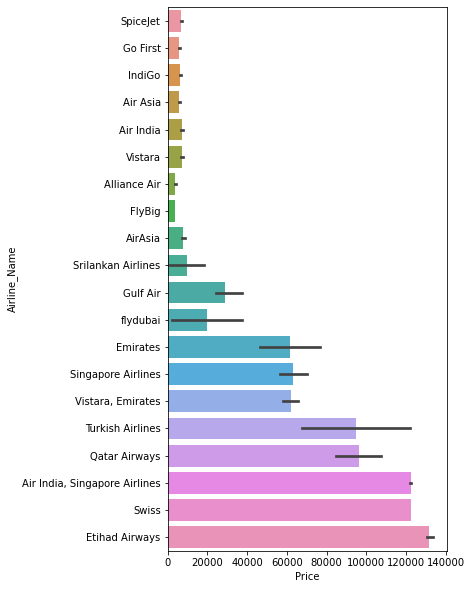

In [81]:
#BarPlot for comparision between "Airline" column and "Price" column
plt.figure(figsize=(5,10))
sns.barplot(y="Airline_Name",data=flight, x='Price')

##### We can observe Airline's 'Etihad Airways' is having highest flight fare.

<AxesSubplot:xlabel='Source', ylabel='Price'>

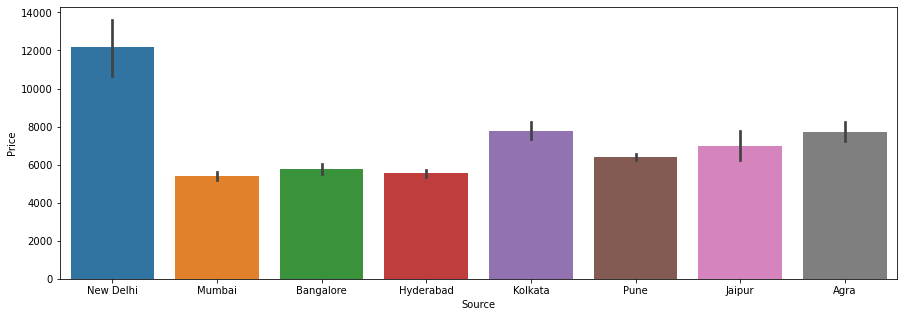

In [82]:
#BarPlot for comparision between "Source" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Source",data=flight, y='Price')

##### We can observe Source 'New Delhi' is having highest flight fare.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

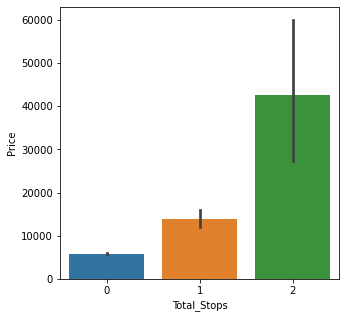

In [83]:
#BarPlot for comparision between "Total_Stops" column and "Price" column
plt.figure(figsize=(5,5))
sns.barplot(x="Total_Stops",data=flight, y='Price')

##### Having Stops '2' is highest flight fare and '0' stops is having least fare.

<AxesSubplot:xlabel='Month', ylabel='Price'>

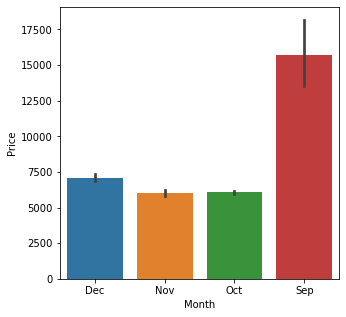

In [84]:
#BarPlot for comparision between "Month_of_Journey" column and "Price" column
plt.figure(figsize=(5,5))
sns.barplot(x="Month",data=flight, y='Price')

##### Fare of Flight in 'Sep' is high

<AxesSubplot:xlabel='Day', ylabel='Price'>

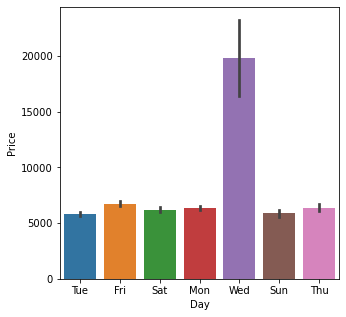

In [85]:
#BarPlot for comparision between "Day_of_Journey" column and "Price" column
plt.figure(figsize=(5,5))
sns.barplot(x="Day",data=flight, y='Price')

##### Fare of Flight on 'Wed' is high

<AxesSubplot:xlabel='Departure_Hour', ylabel='Price'>

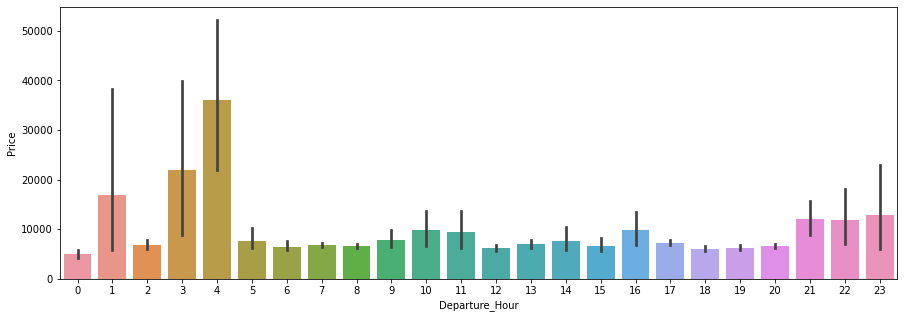

In [86]:
#BarPlot for comparision between "Dep_Hour" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Departure_Hour",data=flight, y='Price')

##### Departing Flight at '4 AM' is having high fare.

<AxesSubplot:xlabel='Departure_Minute', ylabel='Price'>

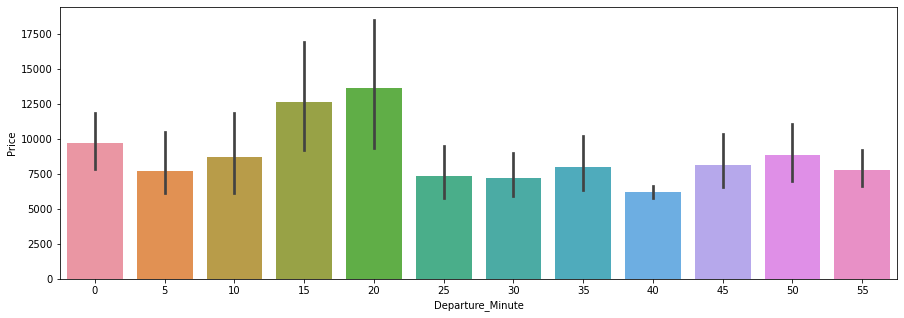

In [87]:
#BarPlot for comparision between "Dep_Minute" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Departure_Minute",data=flight, y='Price')

##### Departing Flight at '50 Minute' is having high fare.

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

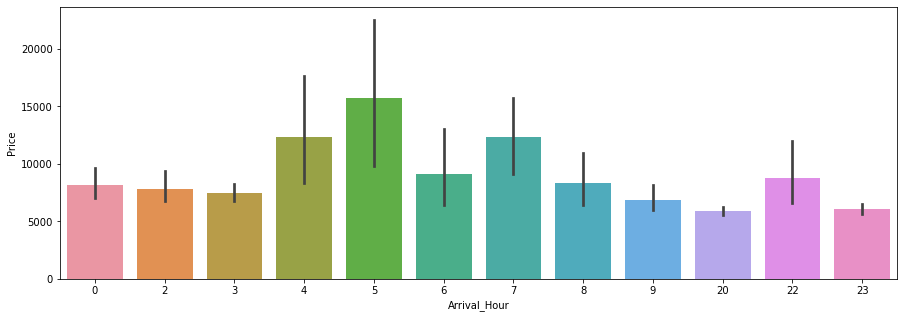

In [88]:
#BarPlot for comparision between "Arrival_Hour" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Arrival_Hour",data=flight, y='Price')

##### Arriving Flight at '5 AM' is having high fare.

<AxesSubplot:xlabel='Arrival_Minute', ylabel='Price'>

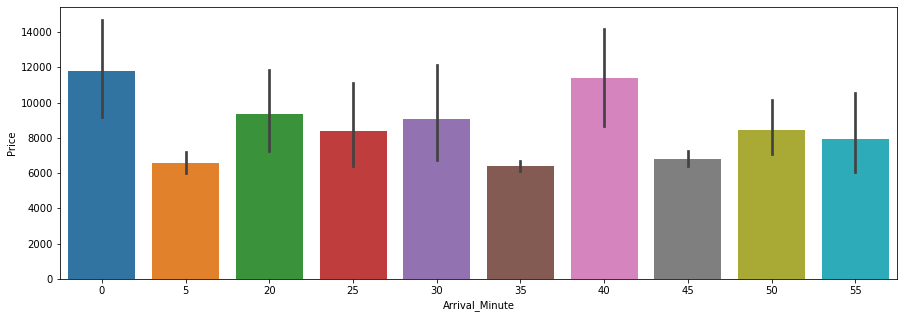

In [89]:
#BarPlot for comparision between "Arrival_Minute" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Arrival_Minute",data=flight, y='Price')

##### Arriving Flight at '20 minute is having high fare.

<AxesSubplot:xlabel='Duration_Hours', ylabel='Price'>

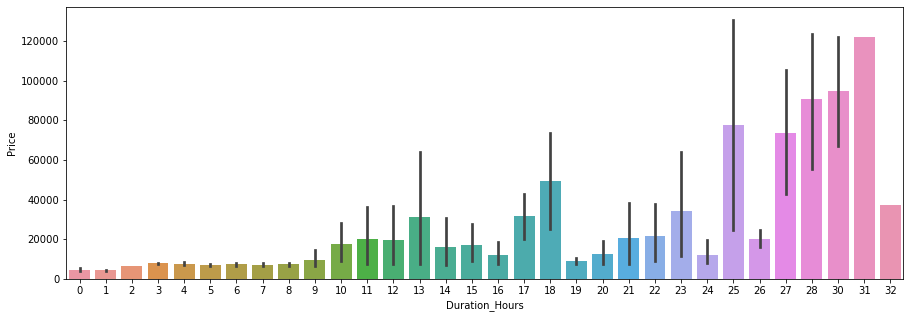

In [90]:
#BarPlot for comparision between "Duration_HoursDuration_Hours" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Duration_Hours",data=flight, y='Price')

##### Flights taking '32 Hours' to reach at Destination from Source is having high fare.

<AxesSubplot:xlabel='Duration_Minutes', ylabel='Price'>

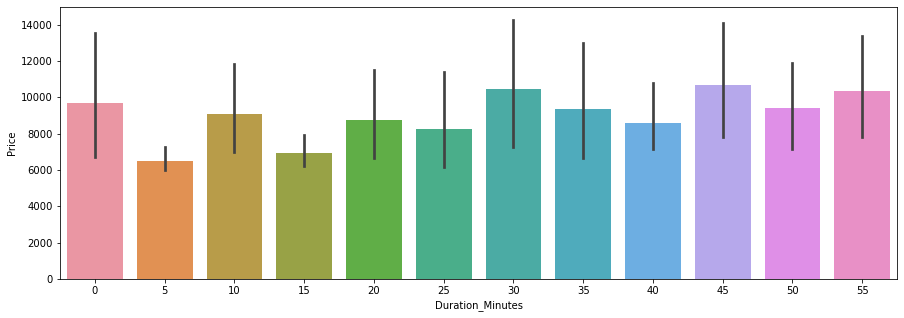

In [91]:
#BarPlot for comparision between "Duration_Minutes" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Duration_Minutes",data=flight, y='Price')

##### Flights taking '30 Minutes' to reach at Destination from Source is having high fare.

# Multivariate Analysis
### Using Pairplot

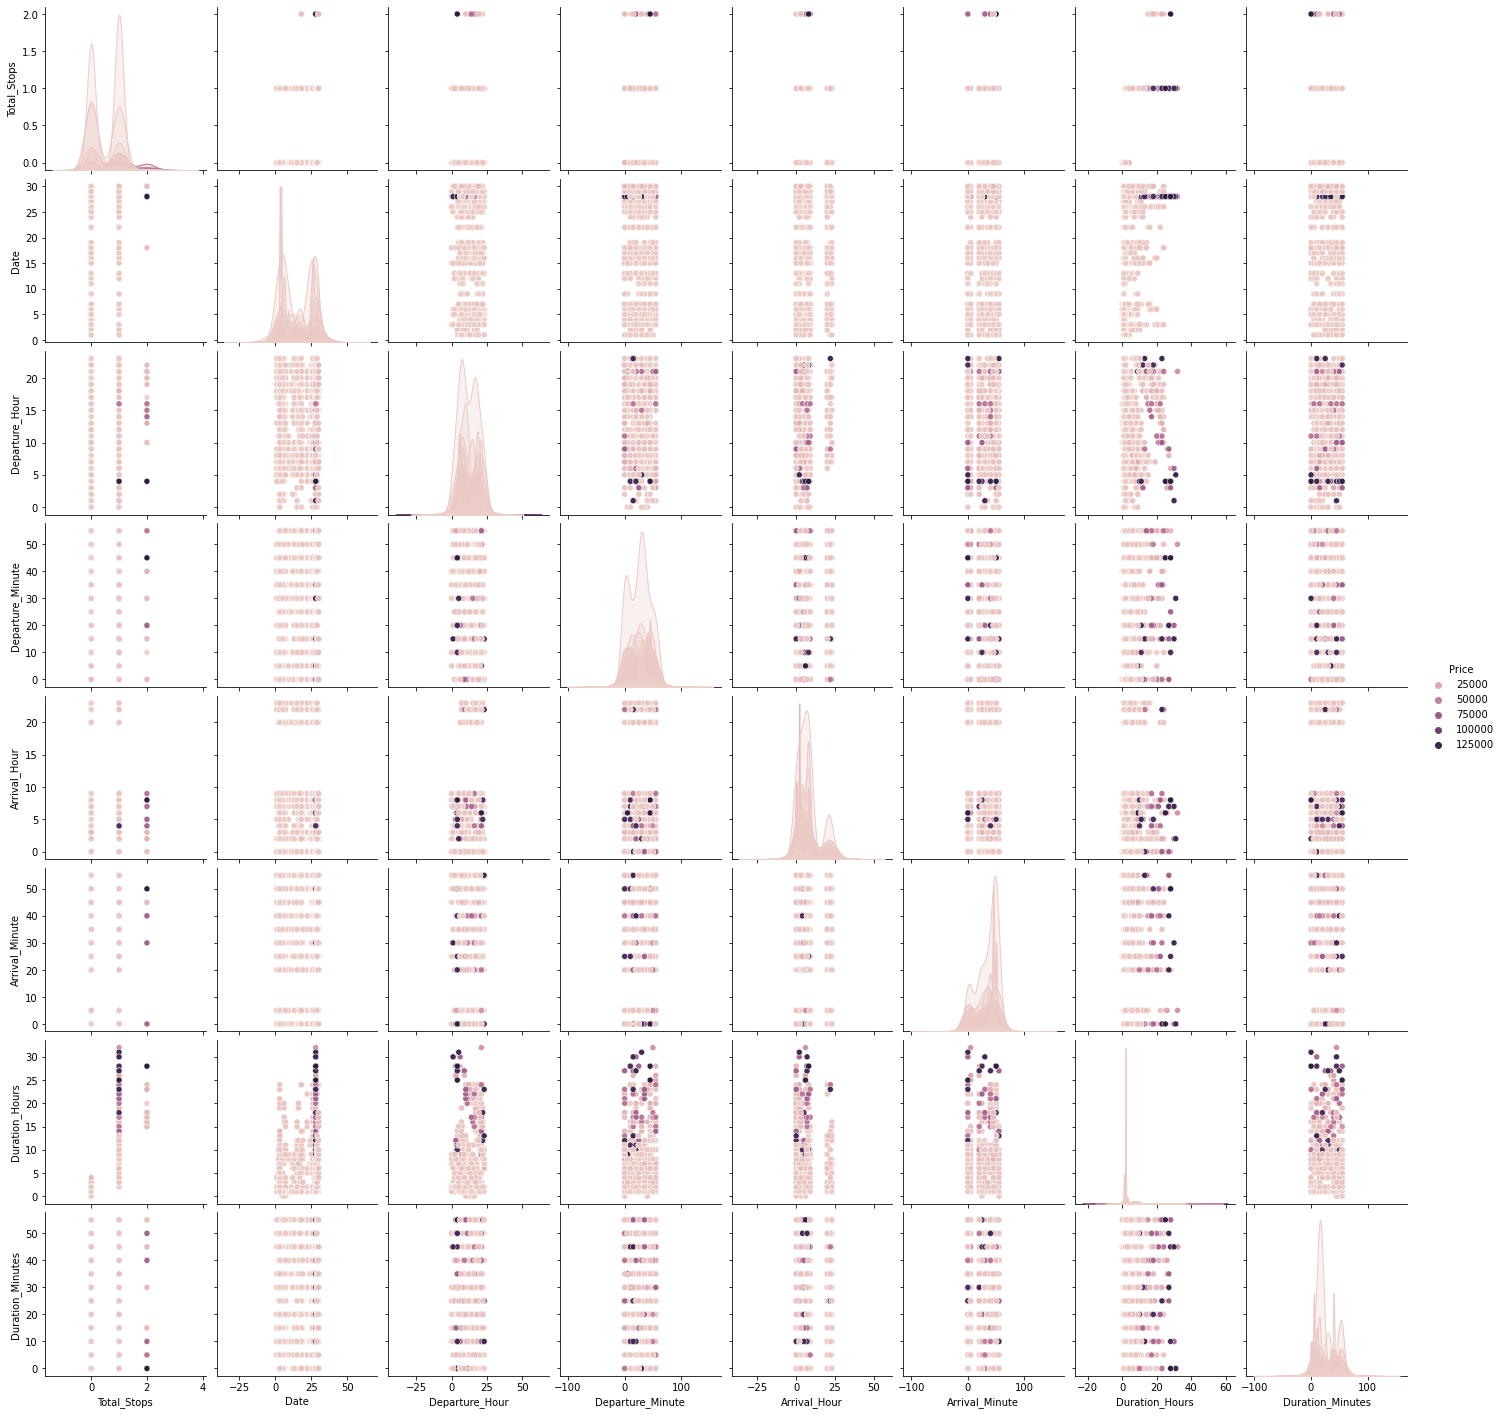

In [92]:
sns.pairplot(flight,hue="Price")

##### We can observe relationship between all the continuous column and the target column by this pairplot in pairs which are plotted on basis of target column.

# Encoding

## Ordinal Encoding

In [93]:
OE = pd.get_dummies(flight[['Airline_Name','Month']],drop_first = False)
OE

,Airline_Name_Air Asia,Airline_Name_Air India,"Airline_Name_Air India, Singapore Airlines",Airline_Name_AirAsia,Airline_Name_Alliance Air,Airline_Name_Emirates,Airline_Name_Etihad Airways,Airline_Name_FlyBig,Airline_Name_Go First,Airline_Name_Gulf Air,...,Airline_Name_Srilankan Airlines,Airline_Name_Swiss,Airline_Name_Turkish Airlines,Airline_Name_Vistara,"Airline_Name_Vistara, Emirates",Airline_Name_flydubai,Month_Dec,Month_Nov,Month_Oct,Month_Sep
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1610,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1611,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1612,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
flight=flight.join(OE)

In [95]:
#Dropping the columns
flight.drop(columns = ['Airline_Name','Month'],inplace=True) 
flight

,Source,Destination,Total_Stops,Price,Day,Date,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,...,Airline_Name_Srilankan Airlines,Airline_Name_Swiss,Airline_Name_Turkish Airlines,Airline_Name_Vistara,"Airline_Name_Vistara, Emirates",Airline_Name_flydubai,Month_Dec,Month_Nov,Month_Oct,Month_Sep
0,New Delhi,Mumbai,0,5951,Tue,13,18,55,2,5,...,0,0,0,0,0,0,1,0,0,0
1,New Delhi,Mumbai,0,5951,Tue,13,19,45,22,5,...,0,0,0,0,0,0,1,0,0,0
2,New Delhi,Mumbai,0,5953,Tue,13,7,0,9,0,...,0,0,0,0,0,0,1,0,0,0
3,New Delhi,Mumbai,0,5953,Tue,13,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,New Delhi,Mumbai,0,5953,Tue,13,15,0,7,50,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,New Delhi,Tirupati,1,10680,Fri,30,7,10,3,45,...,0,0,0,0,0,0,0,0,0,1
1610,New Delhi,Tirupati,2,13095,Fri,30,22,30,3,45,...,0,0,0,0,0,0,0,0,0,1
1611,New Delhi,Tirupati,2,13095,Fri,30,21,15,3,45,...,0,0,0,0,0,0,0,0,0,1
1612,New Delhi,Tirupati,2,13305,Fri,30,20,0,3,45,...,0,0,0,0,0,0,0,0,0,1


In [96]:
flight.dtypes

Source                                        object
Destination                                   object
Total_Stops                                    int64
Price                                          int64
Day                                           object
Date                                           int64
Departure_Hour                                 int64
Departure_Minute                               int64
Arrival_Hour                                   int64
Arrival_Minute                                 int64
Duration_Hours                                 int64
Duration_Minutes                               int64
Airline_Name_Air Asia                          uint8
Airline_Name_Air India                         uint8
Airline_Name_Air India, Singapore Airlines     uint8
Airline_Name_AirAsia                           uint8
Airline_Name_Alliance Air                      uint8
Airline_Name_Emirates                          uint8
Airline_Name_Etihad Airways                   

## Label Encoding

In [97]:
enc = LabelEncoder()
for i in flight.columns:
    if flight[i].dtypes=="object":
        flight[i]=enc.fit_transform(flight[i].values.reshape(-1,1))

In [98]:
flight.dtypes

Source                                        int32
Destination                                   int32
Total_Stops                                   int64
Price                                         int64
Day                                           int32
Date                                          int64
Departure_Hour                                int64
Departure_Minute                              int64
Arrival_Hour                                  int64
Arrival_Minute                                int64
Duration_Hours                                int64
Duration_Minutes                              int64
Airline_Name_Air Asia                         uint8
Airline_Name_Air India                        uint8
Airline_Name_Air India, Singapore Airlines    uint8
Airline_Name_AirAsia                          uint8
Airline_Name_Alliance Air                     uint8
Airline_Name_Emirates                         uint8
Airline_Name_Etihad Airways                   uint8
Airline_Name

#### Checking dataset after transformation

In [99]:
flight.head()

,Source,Destination,Total_Stops,Price,Day,Date,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,...,Airline_Name_Srilankan Airlines,Airline_Name_Swiss,Airline_Name_Turkish Airlines,Airline_Name_Vistara,"Airline_Name_Vistara, Emirates",Airline_Name_flydubai,Month_Dec,Month_Nov,Month_Oct,Month_Sep
0,6,15,0,5951,5,13,18,55,2,5,...,0,0,0,0,0,0,1,0,0,0
1,6,15,0,5951,5,13,19,45,22,5,...,0,0,0,0,0,0,1,0,0,0
2,6,15,0,5953,5,13,7,0,9,0,...,0,0,0,0,0,0,1,0,0,0
3,6,15,0,5953,5,13,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6,15,0,5953,5,13,15,0,7,50,...,0,0,0,0,0,0,1,0,0,0


# Checking Correlation

In [100]:
flight.corr()

,Source,Destination,Total_Stops,Price,Day,Date,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,...,Airline_Name_Srilankan Airlines,Airline_Name_Swiss,Airline_Name_Turkish Airlines,Airline_Name_Vistara,"Airline_Name_Vistara, Emirates",Airline_Name_flydubai,Month_Dec,Month_Nov,Month_Oct,Month_Sep
Source,1.000000,0.084120,-0.089643,0.164518,0.099632,0.081623,0.013083,0.012806,-0.045605,0.031594,...,0.029139,0.020598,0.029139,0.060411,0.058388,0.029139,-0.073393,-0.098440,0.053153,0.076054
Destination,0.084120,1.000000,-0.025564,0.092159,-0.055859,-0.108111,-0.026185,-0.010595,-0.098944,0.001210,...,0.018273,0.012917,0.018273,0.007759,0.036614,0.018273,0.088216,-0.010676,0.198799,-0.248084
Total_Stops,-0.089643,-0.025564,1.000000,0.330153,0.073926,0.217250,-0.067341,0.005736,-0.162463,-0.037838,...,0.046875,0.033135,0.046875,0.031719,0.236450,0.046875,-0.024671,-0.053372,-0.279337,0.368823
Price,0.164518,0.092159,0.330153,1.000000,0.223708,0.212486,-0.028422,-0.056402,-0.043355,-0.043998,...,0.002178,0.197362,0.211219,-0.041816,0.261559,0.026393,-0.027118,-0.121569,-0.153507,0.301359
Day,0.099632,-0.055859,0.073926,0.223708,1.000000,0.120043,-0.036520,-0.004689,0.008702,0.007215,...,0.046086,0.032577,0.046086,-0.040625,0.092344,0.046086,0.013672,-0.023264,-0.171063,0.202529
Date,0.081623,-0.108111,0.217250,0.212486,0.120043,1.000000,-0.038767,0.029191,0.018876,-0.038214,...,0.040328,0.028507,0.040328,-0.038016,0.080807,0.040328,-0.077263,-0.396497,-0.234920,0.688659
Departure_Hour,0.013083,-0.026185,-0.067341,-0.028422,-0.036520,-0.038767,1.000000,0.013759,0.302351,-0.001810,...,0.029351,-0.047481,-0.041620,0.117766,0.060235,-0.050137,-0.048057,0.081194,-0.032613,-0.022385
Departure_Minute,0.012806,-0.010595,0.005736,-0.056402,-0.004689,0.029191,0.013759,1.000000,-0.070892,-0.053882,...,0.035079,-0.016276,-0.003657,0.094548,0.016928,-0.013341,-0.077083,-0.037485,0.031832,0.040139
Arrival_Hour,-0.045605,-0.098944,-0.162463,-0.043355,0.008702,0.018876,0.302351,-0.070892,1.000000,-0.054635,...,-0.007181,-0.001561,-0.027071,0.072226,-0.014388,-0.009667,0.041700,-0.034643,0.050462,-0.040425
Arrival_Minute,0.031594,0.001210,-0.037838,-0.043998,0.007215,-0.038214,-0.001810,-0.053882,-0.054635,1.000000,...,0.013023,-0.000755,-0.057429,0.066832,0.007272,-0.001068,0.004497,0.061963,-0.026986,-0.034727


This gives the correlation between the denpendent and independent variables.

In [101]:
flight.corr()["Price"].sort_values()

Month_Oct                                    -0.153507
Airline_Name_IndiGo                          -0.151263
Month_Nov                                    -0.121569
Airline_Name_Air Asia                        -0.074426
Airline_Name_Go First                        -0.070806
Departure_Minute                             -0.056402
Arrival_Minute                               -0.043998
Arrival_Hour                                 -0.043355
Airline_Name_Vistara                         -0.041816
Airline_Name_Alliance Air                    -0.039511
Airline_Name_SpiceJet                        -0.038524
Airline_Name_Air India                       -0.038258
Departure_Hour                               -0.028422
Month_Dec                                    -0.027118
Airline_Name_FlyBig                          -0.012333
Airline_Name_AirAsia                         -0.006732
Airline_Name_Srilankan Airlines               0.002178
Airline_Name_flydubai                         0.026393
Duration_M

#### We can observe :

- All columns are sorted in ascending order showing least to strong correlation with target column.
- 16 columns are negatively correlated and 19 columns are positively correlated with target column.
- Column 'Airline_Name_Qatar Airways' is highly positively correlated with Target column and Column 'Airline_Name_AirAsia' is highly negatively correlated with Target column

## Checking correlation with heatmap

<AxesSubplot:>

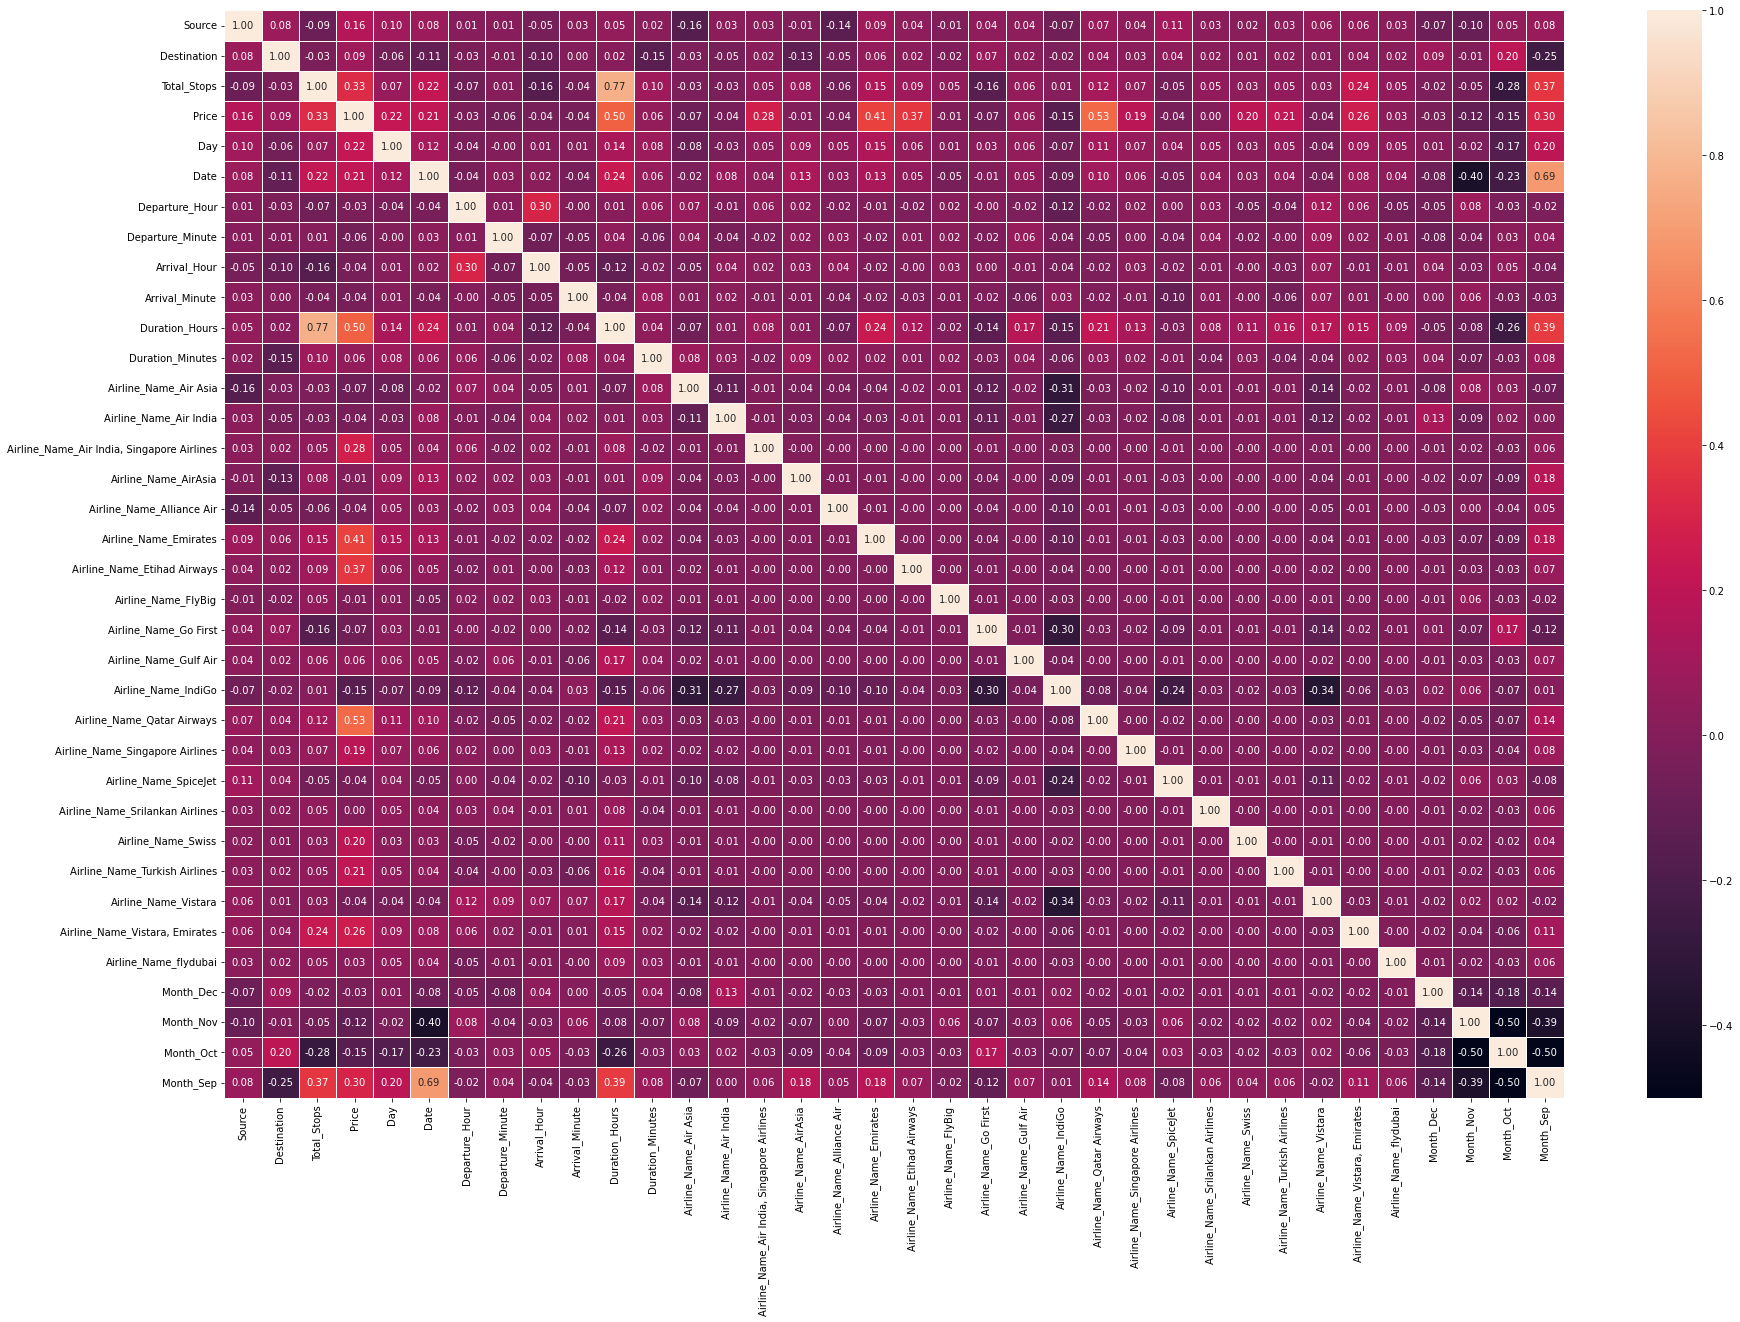

In [102]:
plt.figure(figsize=(30,20))
sns.heatmap(flight.corr(),annot=True,annot_kws= {"size": 10}, linewidth=0.5, linecolor='white', fmt='.2f')

### Outcome of Correlation
- __Source__ has __5 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Destination__ has __3 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Total_Stops__ has __10 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Day__ has __9 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Date__ has __7 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Month__ has __8 percent__ correlation with the target column which can be considered as weak correlation and positively correlated. 
- __Departure_Hour__ has __-0 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Departure_Minute__ has __3 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Arrival_Hour__ has __-3 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Arrival_Minute__ has __-5 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Duration_Hours__ has __18 percent__ correlation with the target column which can be considered as strong correlation and positively correlated. 
- __Duration_Minutes__ has __-1 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 


 - Max correlation is with __Airline_Name_Qatar Airways__
 - Min correlation is with __Airline_Name_Srilankan Airlines__

### Checking correlation with barplot

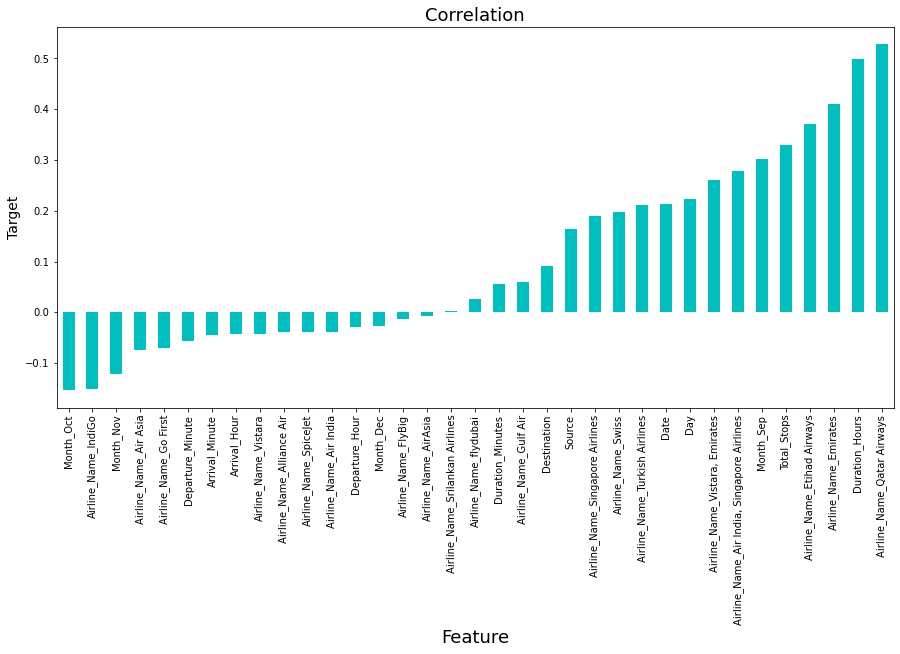

In [103]:
plt.figure(figsize=(15,7))
flight.corr()['Price'].sort_values(ascending=True).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

#### Observation:
- Target column (Price) has Highest Positively Correlation with column 'Airline_Name_Qatar Airways'.
- Target column (Price) has least correlation with column 'Airline_Name_Srilankan Airlines'. 
- Target column (Price) has Highly Negatively Correlated with column 'Airline_Name_AirAsia'.

# Checking Outliers

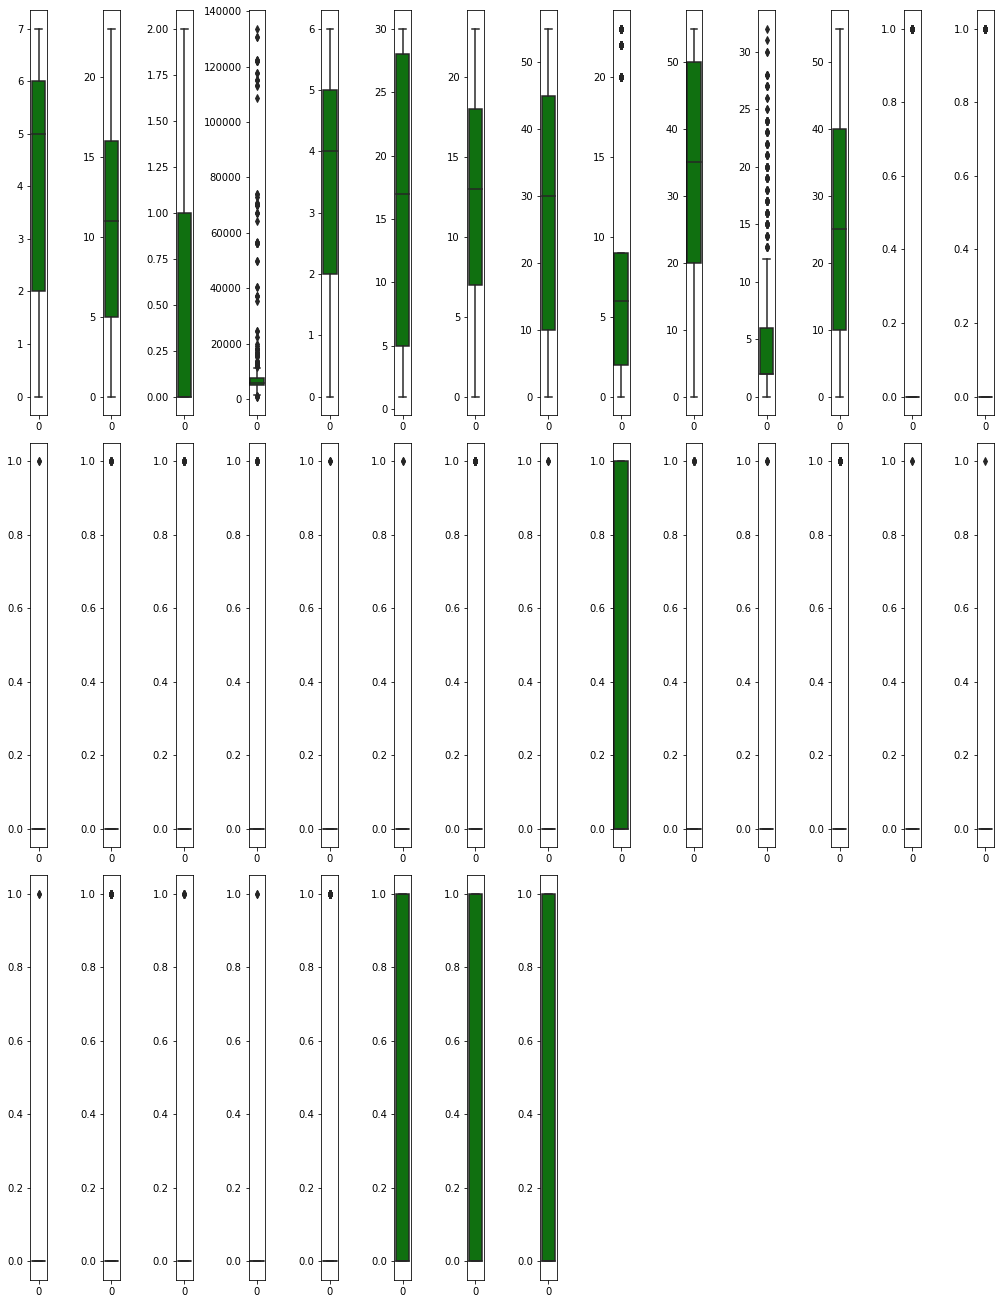

In [104]:
collist= flight.columns.values
ncol=14
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=flight[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:
- __Outliers present in columns:__ 'Price', 'Arrival_Hour', 'Duration_Hours', 'Airline_Name_Air Asia', 'Airline_Name_Air India', 'Airline_Name_Air India,Singapore Airlines', 'Airline_Name_AirAsia', 'Airline_Name_Alliance Air', 'Airline_Name_Emirates', 'Airline_Name_Etihad Airways', 'Airline_Name_FlyBig', 'Airline_Name_Go First', 'Airline_Name_IndiGo', 'Airline_Name_Qatar Airways', 'Airline_Name_Singapore Airlines', 'Airline_Name_SpiceJet', 'Airline_Name_Srilankan Airlines', 'Airline_Name_Swiss', 'Airline_Name_Turkish Airlines', 'Airline_Name_Vistara', 'Airline_Name_Vistara, Emirates', 'Airline_Name_flydubai', 'Day_Fri', 'Day_Mon', 'Day_Sat', 'Day_Sun', 'Day_Thu', 'Day_Tue', 'Day_Wed' and 'Month_Dec'.

- But we will not remove Outliers from "Price" column as it is our Target column and also from categorical columns. So, we will only remove outliers from "Arrival_Hour" and "Duration_Hours".

- __Outliers not present in columns:__ 'Source', 'Destination', 'Total_Stops', 'Date','Departure_Hour', 'Departure_Minute', 'Arrival_Minute', 'Duration_Minutes', 'Airline_Name_Gulf Air', 'Month_Nov', 'Month_Oct' and 'Month_Sep'.


# Removing Outliers
## 1.1 Zscore method using Scipy

In [105]:
variable = flight[['Arrival_Hour', 'Duration_Hours']]

z=np.abs(zscore(variable))

# Creating new dataframe
flight_price = flight[(z<3).all(axis=1)]
z.head()

,Arrival_Hour,Duration_Hours
0,0.767591,0.473573
1,2.052311,0.473573
2,0.219374,0.473573
3,1.049582,0.473573
4,0.062616,0.473573


In [106]:
print("Old DataFrame data in Rows and Column:",flight.shape)
print("New DataFrame data in Rows and Column:",flight_price.shape)
print("Total Dropped rows:",flight.shape[0]-flight_price.shape[0])

Old DataFrame data in Rows and Column: (1610, 36)
New DataFrame data in Rows and Column: (1559, 36)
Total Dropped rows: 51


### 1.2 Percentage Data Loss using Zscore

In [107]:
loss_percent=(1610-1559)/1610*100
print("loss_percent= ",loss_percent,"%")

loss_percent=  3.1677018633540373 %


## 2. IQR (Inter Quantile Range) method

In [108]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
flight_price_pred=flight[~((flight < (Q1 - 1.5 * IQR)) |(flight > (Q3 + 1.5 * IQR))).any(axis=1)]

In [109]:
print("Old DataFrame data in Rows and Column:",flight.shape)
print("\nNew DataFrame data in Rows and Column:",flight_price_pred.shape)
print("\nTotal Dropped rows:",flight.shape[0]-flight_price_pred.shape[0])

Old DataFrame data in Rows and Column: (1610, 36)

New DataFrame data in Rows and Column: (1197, 36)

Total Dropped rows: 413


### 2.2 Percentage Data Loss using IQR

In [110]:
loss_perc = (1610-1197)/1610*100
print("loss_percent= ",loss_perc,"%")

loss_percent=  25.65217391304348 %


##### We can observe that by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

# Checking Skewness

In [111]:
flight.skew()

Source                                        -0.787126
Destination                                    0.015304
Total_Stops                                    0.929689
Price                                          6.322378
Day                                           -0.255838
Date                                          -0.060242
Departure_Hour                                -0.037769
Departure_Minute                              -0.012425
Arrival_Hour                                   1.096090
Arrival_Minute                                -0.427467
Duration_Hours                                 2.175547
Duration_Minutes                               0.210981
Airline_Name_Air Asia                          2.496231
Airline_Name_Air India                         2.962561
Airline_Name_Air India, Singapore Airlines    28.346043
Airline_Name_AirAsia                           9.049937
Airline_Name_Alliance Air                      8.591705
Airline_Name_Emirates                          8

## Checking skweness through Data Visualization

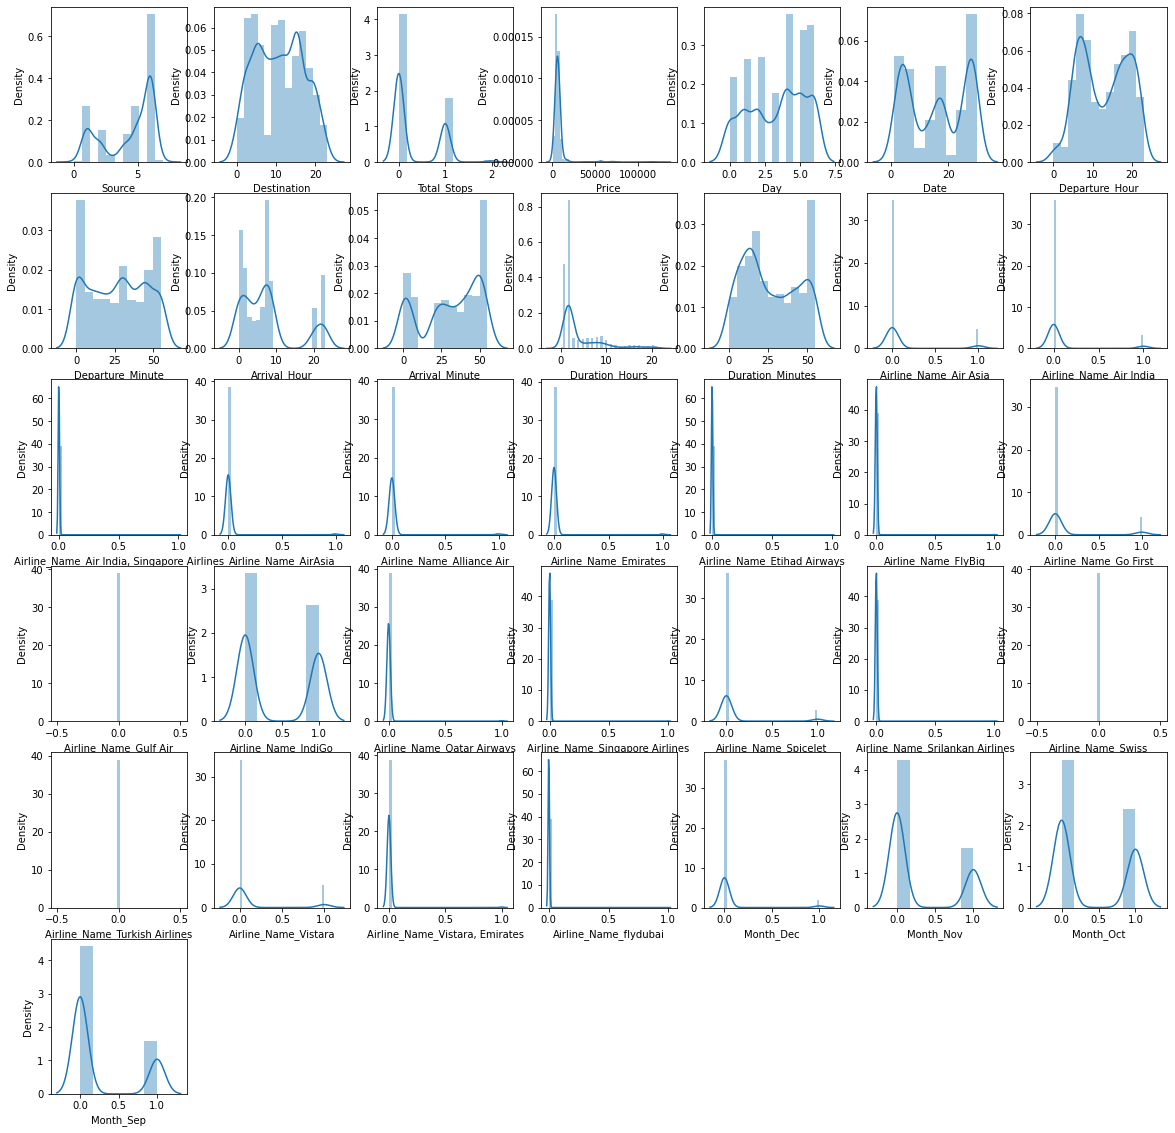

In [112]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in flight_price:
    if plotnumber<=42:
        ax = plt.subplot(6,7,plotnumber)
        sns.distplot(flight_price[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### Observation:
- Skewness threshold taken is +/-0.25

- All the columns are not normallly distributed, they are skewed.

- Columns which are having skewness: Source, Total_Stops, Price, Arrival_Minute, Duration_Hours, Duration_Minutes, Airline_Name_Air Asia, Airline_Name_Air India, Airline_Name_Air India, Singapore Airlines, Airline_Name_AirAsia, Airline_Name_Alliance Air, Airline_Name_Emirates, Airline_Name_Etihad Airways, Airline_Name_FlyBig, Airline_Name_Go First, Airline_Name_Gulf Air, Airline_Name_IndiGo, Airline_Name_Qatar Airways, Airline_Name_Singapore Airlines, Airline_Name_SpiceJet, Airline_Name_Srilankan Airlines, Airline_Name_Swiss, Airline_Name_Turkish Airlines, Airline_Name_Vistara, Airline_Name_Vistara, Emirates , Airline_Name_flydubai, Day_Fri, Day_Mon, Day_Sat , Day_Sun, Day_Thu, Day_Tue, Day_Wed, Month_Dec, Month_Nov, Month_Oct, Month_Sep 

- The 'Source' column data is negatively highly skewed and 'Airline_Name_Swiss' is positively highly skewed

- We will not remove skewness from categorical columns and also from Target Column 'Price'. 

- So we will remove skewness from 'Total_Stops', 'Arrival_Hour', 'Arrival_Minute' and 'Duration_Hours' as these column contain continuous data.

# Removing skewness using yeo-johnson method

In [113]:
collist=['Total_Stops', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours']
flight_price[collist]=power_transform(flight_price[collist],method='yeo-johnson')
flight_price[collist]

,Total_Stops,Arrival_Hour,Arrival_Minute,Duration_Hours
0,-0.667918,-0.712257,-1.366713,-0.212742
1,-0.667918,1.593577,-1.366713,-0.212742
2,-0.667918,0.519214,-1.753315,-0.212742
3,-0.667918,-1.574682,-1.753315,-0.212742
4,-0.667918,0.264579,0.982897,-0.212742
...,...,...,...,...
1609,1.492846,-0.448153,0.754184,1.083569
1610,1.643379,-0.448153,0.754184,1.710477
1611,1.643379,-0.448153,0.754184,1.741565
1612,1.643379,-0.448153,0.754184,1.769465


## checking skewness after removal

In [114]:
flight_price.skew()

Source                                        -0.755216
Destination                                    0.038254
Total_Stops                                    0.830495
Price                                          7.946097
Day                                           -0.228907
Date                                          -0.013773
Departure_Hour                                -0.041652
Departure_Minute                              -0.007290
Arrival_Hour                                  -0.065429
Arrival_Minute                                -0.606840
Duration_Hours                                 0.181033
Duration_Minutes                               0.232383
Airline_Name_Air Asia                          2.438735
Airline_Name_Air India                         3.047458
Airline_Name_Air India, Singapore Airlines    39.484174
Airline_Name_AirAsia                           8.900414
Airline_Name_Alliance Air                      8.449207
Airline_Name_Emirates                         10

Still we can see skewness is present but from earlier it is removed.

### checking skewness after removal through data visualization using distplot

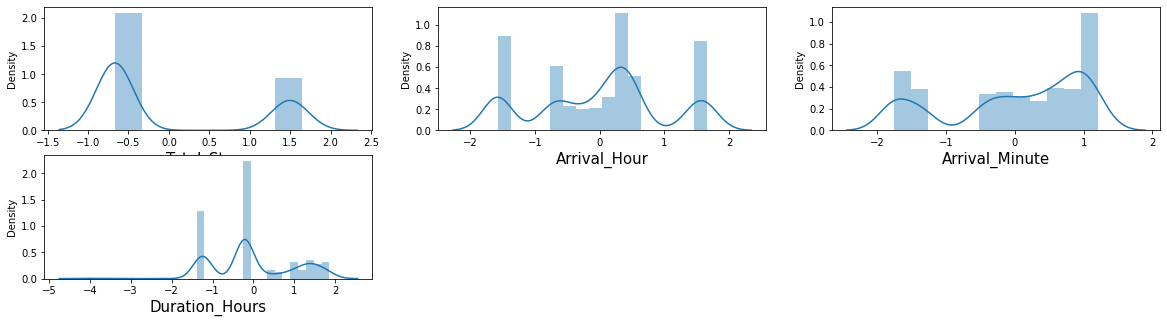

In [115]:
collist=['Total_Stops', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours']
plt.figure(figsize=(20,5), facecolor='white')
plotnumber = 1

for column in flight_price[collist]:
    if plotnumber<=4:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(flight_price[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Data preprocessing
## Spliting data into Target and Features:

In [116]:
x=flight_price.drop("Price",axis=1)
y=flight_price["Price"]

In [117]:
x.columns

Index(['Source', 'Destination', 'Total_Stops', 'Day', 'Date', 'Departure_Hour',
       'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Name_Air Asia', 'Airline_Name_Air India',
       'Airline_Name_Air India, Singapore Airlines', 'Airline_Name_AirAsia',
       'Airline_Name_Alliance Air', 'Airline_Name_Emirates',
       'Airline_Name_Etihad Airways', 'Airline_Name_FlyBig',
       'Airline_Name_Go First', 'Airline_Name_Gulf Air', 'Airline_Name_IndiGo',
       'Airline_Name_Qatar Airways', 'Airline_Name_Singapore Airlines',
       'Airline_Name_SpiceJet', 'Airline_Name_Srilankan Airlines',
       'Airline_Name_Swiss', 'Airline_Name_Turkish Airlines',
       'Airline_Name_Vistara', 'Airline_Name_Vistara, Emirates',
       'Airline_Name_flydubai', 'Month_Dec', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],
      dtype='object')

In [118]:
x.head()

,Source,Destination,Total_Stops,Day,Date,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,...,Airline_Name_Srilankan Airlines,Airline_Name_Swiss,Airline_Name_Turkish Airlines,Airline_Name_Vistara,"Airline_Name_Vistara, Emirates",Airline_Name_flydubai,Month_Dec,Month_Nov,Month_Oct,Month_Sep
0,6,15,-0.667918,5,13,18,55,-0.712257,-1.366713,-0.212742,...,0,0,0,0,0,0,1,0,0,0
1,6,15,-0.667918,5,13,19,45,1.593577,-1.366713,-0.212742,...,0,0,0,0,0,0,1,0,0,0
2,6,15,-0.667918,5,13,7,0,0.519214,-1.753315,-0.212742,...,0,0,0,0,0,0,1,0,0,0
3,6,15,-0.667918,5,13,8,0,-1.574682,-1.753315,-0.212742,...,0,0,0,0,0,0,1,0,0,0
4,6,15,-0.667918,5,13,15,0,0.264579,0.982897,-0.212742,...,0,0,0,0,0,0,1,0,0,0


In [119]:
y.head()

0    5951
1    5951
2    5953
3    5953
4    5953
Name: Price, dtype: int64

In [120]:
x.shape, y.shape

((1559, 35), (1559,))

# Scaling data using Standard Scaler

In [122]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [123]:
x.head()

,Source,Destination,Total_Stops,Day,Date,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,...,Airline_Name_Srilankan Airlines,Airline_Name_Swiss,Airline_Name_Turkish Airlines,Airline_Name_Vistara,"Airline_Name_Vistara, Emirates",Airline_Name_flydubai,Month_Dec,Month_Nov,Month_Oct,Month_Sep
0,0.839012,0.68877,-0.667918,0.836952,-0.298544,0.826459,1.546726,-0.712257,-1.366713,-0.212742,...,-0.03584,0.0,0.0,-0.388012,-0.071819,-0.025335,4.299709,-0.63203,-0.816933,-0.597354
1,0.839012,0.68877,-0.667918,0.836952,-0.298544,0.987535,0.998817,1.593577,-1.366713,-0.212742,...,-0.03584,0.0,0.0,-0.388012,-0.071819,-0.025335,4.299709,-0.63203,-0.816933,-0.597354
2,0.839012,0.68877,-0.667918,0.836952,-0.298544,-0.945381,-1.466771,0.519214,-1.753315,-0.212742,...,-0.03584,0.0,0.0,-0.388012,-0.071819,-0.025335,4.299709,-0.63203,-0.816933,-0.597354
3,0.839012,0.68877,-0.667918,0.836952,-0.298544,-0.784304,-1.466771,-1.574682,-1.753315,-0.212742,...,-0.03584,0.0,0.0,-0.388012,-0.071819,-0.025335,4.299709,-0.63203,-0.816933,-0.597354
4,0.839012,0.68877,-0.667918,0.836952,-0.298544,0.343230,-1.466771,0.264579,0.982897,-0.212742,...,-0.03584,0.0,0.0,-0.388012,-0.071819,-0.025335,4.299709,-0.63203,-0.816933,-0.597354


# Checking for Multicolinearity
## VIF (Variance Inflation factor)

In [124]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.246093,Source
1,1.190305,Destination
2,5.005202,Total_Stops
3,1.119536,Day
4,2.001797,Date
5,1.093143,Departure_Hour
6,1.048559,Departure_Minute
7,1.095693,Arrival_Hour
8,1.049719,Arrival_Minute
9,4.949811,Duration_Hours


In [125]:
#dropping columns having no relation with Target Feature
x.drop(columns=['Airline_Name_Gulf Air', 'Airline_Name_Swiss', 'Airline_Name_Turkish Airlines'],inplace=True)

In [126]:
#checking again multicollinearity
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.246093,Source
1,1.190305,Destination
2,5.005202,Total_Stops
3,1.119536,Day
4,2.001797,Date
5,1.093143,Departure_Hour
6,1.048559,Departure_Minute
7,1.095693,Arrival_Hour
8,1.049719,Arrival_Minute
9,4.949811,Duration_Hours


##### We can check Multicolinearity is not present as all columns VIF Values are less than 10.

# Variance Threshold Method
It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [127]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [128]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [129]:
x.columns[var_threshold.get_support()]

Index(['Source', 'Destination', 'Total_Stops', 'Day', 'Date', 'Departure_Hour',
       'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Name_Air Asia', 'Airline_Name_Air India',
       'Airline_Name_Air India, Singapore Airlines', 'Airline_Name_AirAsia',
       'Airline_Name_Alliance Air', 'Airline_Name_Emirates',
       'Airline_Name_Etihad Airways', 'Airline_Name_FlyBig',
       'Airline_Name_Go First', 'Airline_Name_IndiGo',
       'Airline_Name_Qatar Airways', 'Airline_Name_Singapore Airlines',
       'Airline_Name_SpiceJet', 'Airline_Name_Srilankan Airlines',
       'Airline_Name_Vistara', 'Airline_Name_Vistara, Emirates',
       'Airline_Name_flydubai', 'Month_Dec', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],
      dtype='object')

In [130]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


##### So with the help of variance threshold method, we got to know all the features here are important. So, we will check select kbest features.

## Selecting Kbest Features

In [131]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [132]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(40,'Score'))

                                       Feature       Score
18                         Airline_Name_FlyBig         inf
17                 Airline_Name_Etihad Airways         inf
0                                       Source  176.019858
21                  Airline_Name_Qatar Airways   42.222750
20                         Airline_Name_IndiGo   40.903461
2                                  Total_Stops   31.738927
9                               Duration_Hours   28.725946
11                       Airline_Name_Air Asia   28.232583
1                                  Destination   27.959133
19                       Airline_Name_Go First   19.059339
23                       Airline_Name_SpiceJet   18.072790
25                        Airline_Name_Vistara   17.852996
16                       Airline_Name_Emirates   16.487656
14                        Airline_Name_AirAsia   14.041779
15                   Airline_Name_Alliance Air   12.197478
31                                   Month_Sep   10.6489

In [133]:
#dropping columns
x.drop(columns=['Airline_Name_Etihad Airways', 'Airline_Name_FlyBig'],inplace=True)

In [134]:
#checking again 
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [135]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(40,'Score'))

                                       Feature       Score
0                                       Source  176.019858
19                  Airline_Name_Qatar Airways   42.222750
18                         Airline_Name_IndiGo   40.903461
2                                  Total_Stops   31.738927
9                               Duration_Hours   28.725946
11                       Airline_Name_Air Asia   28.232583
1                                  Destination   27.959133
17                       Airline_Name_Go First   19.059339
21                       Airline_Name_SpiceJet   18.072790
23                        Airline_Name_Vistara   17.852996
16                       Airline_Name_Emirates   16.487656
14                        Airline_Name_AirAsia   14.041779
15                   Airline_Name_Alliance Air   12.197478
29                                   Month_Sep   10.648970
24              Airline_Name_Vistara, Emirates    9.520206
12                      Airline_Name_Air India    8.8712

##### Now, we will create model.

# Creating Model
### Finding the best random state among all the models
On the basis of target column, we will understand this by Regression Problem

In [136]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9834311445811676 on random_state: 96


# Creating train-test-split

In [137]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = maxRS)

# Regression Algorithms
## 1. Linear Regression

In [138]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.7195839708123732
Mean abs error: 2173.2375624945653
Mean squared error: 50559350.336292826


### Checking the performance of the model by graph

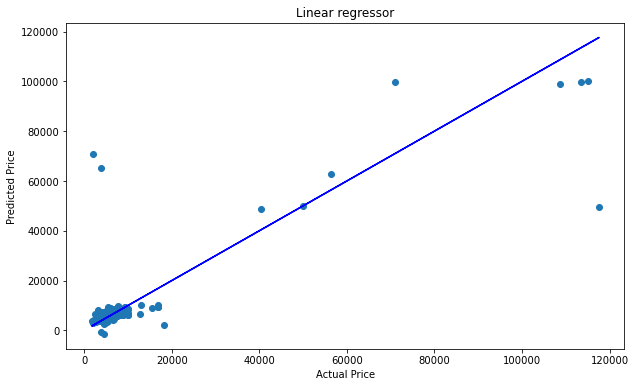

In [139]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear regressor")
plt.show()

## 2. Random Forest Regression Model

In [140]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=maxRS)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.9318103918030993
Mean abs error: 785.5047061965812
Mean squared error: 12294669.10329451


### Checking the performance of the model by graph

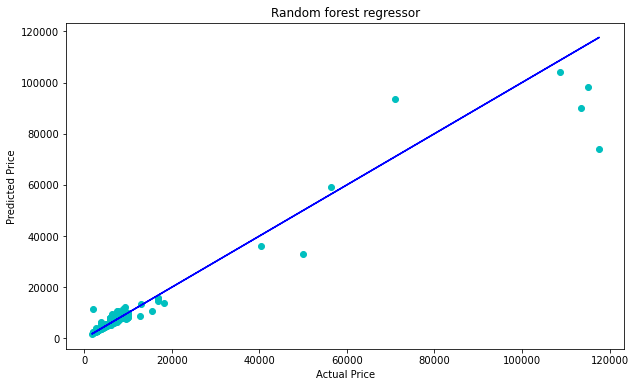

In [141]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random forest regressor")
plt.show()

## 3. KNN Regressor

In [142]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predknn)))

R2_Score: 0.7098807663881705
Mean abs error: 1917.93198005698
Mean squared error: 52308849.86843147
Root Mean Squared Error:  7232.485732335147


### Checking the performance of the model by graph

Text(0.5, 1.0, 'K-nearest neighbors  regressor')

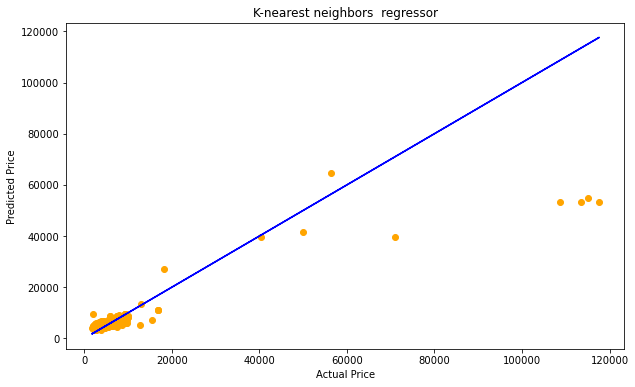

In [143]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("K-nearest neighbors  regressor")

## 4. Gradient boosting Regressor

In [144]:
# Checking R2 score for GBR
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=maxRS, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predGb)))

R2_Score: 0.9394371563064738
Mean abs error: 1142.2811299364803
Mean squared error: 10919554.20855893
Root Mean Squared Error:  3304.4748763697585


### Checking the performance of the model by graph

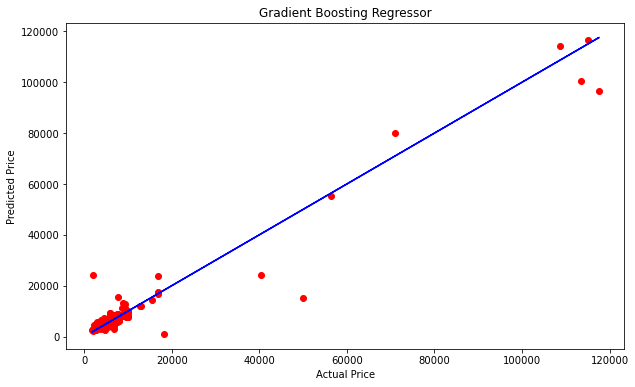

In [145]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting Regressor")
plt.show()

## 5. Decision Tree Regressor

In [146]:
# Checking R2 score for GBR
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)

#prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predDTR)))

R2_Score: 0.8895875641934212
Mean abs error: 737.2980769230769
Mean squared error: 19907496.157051284
Root Mean Squared Error:  4461.781724496536


### Checking the performance of the model by graph

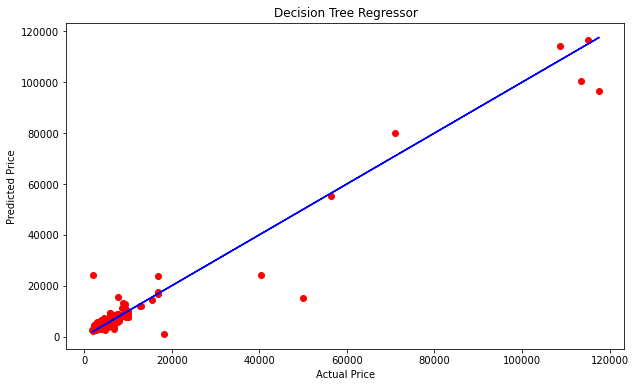

In [147]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor")
plt.show()

# Cross Validation Score for all the model

In [148]:
#CV Score for Linear Regression
print('CV score for Linear Regression: ',cross_val_score(LR,x,y,cv=5).mean())

#CV Score for Random Forest Regression
print('CV score for Random forest Regression: ',cross_val_score(RFR,x,y,cv=5).mean())

#CV Score for KNN Regression
print('CV score for KNN Regression: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for Gradient Boosting Regression
print('CV score for Gradient Boosting Regression: ',cross_val_score(Gb,x,y,cv=5).mean())

#CV Score for Decision Tree Regression
print('CV score for Decision Tree Regression: ',cross_val_score(DTR,x,y,cv=5).mean())

CV score for Linear Regression:  -4.484765538827662
CV score for Random forest Regression:  0.512448472901896
CV score for KNN Regression:  0.09461952809459373
CV score for Gradient Boosting Regression:  0.05861027412094597
CV score for Decision Tree Regression:  0.5376863299353738


##### So accrording to the R2 score and Cross validation score of all the model we can see that the best model is gradient boosting regressor and random forest regressor. Now, we will check which one is best after hyper tuning.

# Hyper Parameter Tuning
## The Gradient boosting regressor with GridsearchCV

In [149]:
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [150]:
CV_GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)

In [151]:
CV_GBR.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [152]:
CV_GBR.best_params_

{'alpha': 0.001,
 'learning_rate': 1,
 'max_depth': 1,
 'n_estimators': 300,
 'subsample': 0.5}

### Creating Regressor Model with Gradient Boosting Regressor

In [153]:
GBR = GradientBoostingRegressor(n_estimators=400, alpha=0.001,learning_rate= 0.1, max_depth= 4, subsample = 0.5)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, max_depth=4, n_estimators=400,
                          subsample=0.5)

In [154]:
#prediction
GBRpred = GBR.predict(x_test)
#R2 score
acc = r2_score(y_test,GBRpred)
print(acc*100)

92.54225634388459


##### So after the Hypertuning now we have got a descent accuracy score of 92% on Gradient boosting

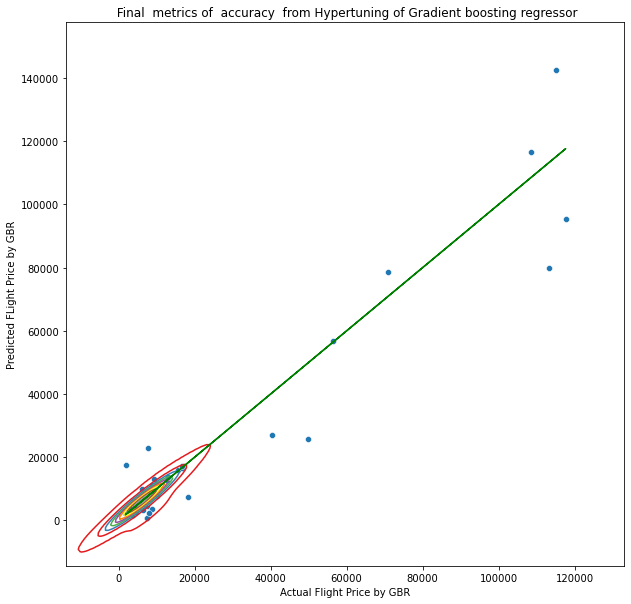

In [162]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=GBRpred,palette='Set2')
sns.kdeplot(x=y_test,y=GBRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Flight Price by GBR")
plt.ylabel("Predicted FLight Price by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

## The Random Forest regressor with GridsearchCV

In [163]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [164]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [165]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [166]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 30}

### Creating Regressor Model with Random Forest Regressor

In [167]:
RFR = RandomForestRegressor(random_state=50, max_features='auto', n_estimators= 200, max_depth=6, criterion='mse')
RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=200, random_state=50)

In [168]:
#prediction
RFRpred = RFR.predict(x_test)
#R2 score
acc = r2_score(y_test,RFRpred)
print(acc*100)

91.8258941511163


##### So after the Hypertuning now we have got a descent accuracy score of 91% on Random Forest Regressor

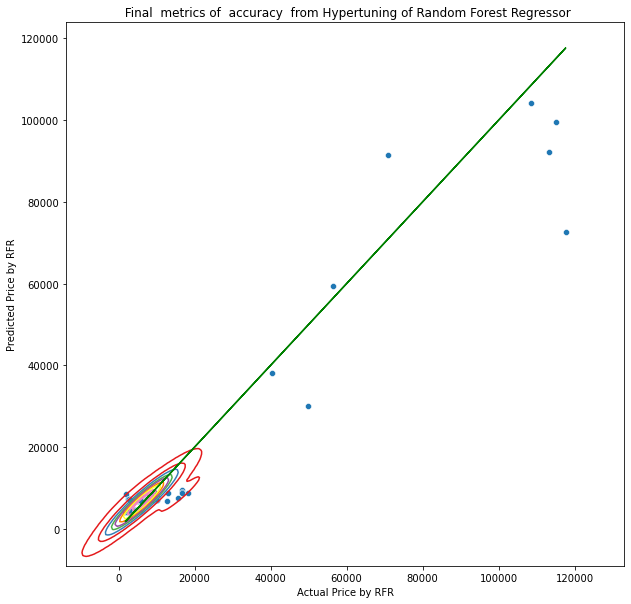

In [169]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=RFRpred,palette='Set2')
sns.kdeplot(x=y_test,y=RFRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Price by RFR")
plt.ylabel("Predicted Price by RFR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Random Forest Regressor")
plt.show()

##### After checking both model it is concluded that Gradient Boosting Regressor is giving best R2 Score. So, we will save and predict on GBR.

### Saving The Predictive Model

In [156]:
#saving the model at local file system
filename='flight_price_prediction.pickle'
pickle.dump(CV_GBR,open(filename,'wb'))
#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([  3033.31855632,   5937.4777513 ,   7127.17884771,   3997.70293329,
         6576.55083247,   7459.37802779,   6782.47409439,   6134.80586901,
         6081.2088128 ,   9430.76043283,   4593.2674217 ,   8015.86075879,
         5989.79692568,   5937.4777513 ,   5937.4777513 ,   3634.33249356,
         3807.13671895,   4957.85084979,   5833.02022118,   6311.75267668,
         8190.42721674,   6134.80586901,   5868.3547508 ,   6385.90706167,
         5678.02279667,   6773.87895018,   6626.9733856 ,   7027.35589635,
         6406.28837172,   9145.05540658,   3223.65051045,   6627.89187484,
       112625.52337616,   7017.88188457,  51021.42624203,   6327.46776103,
         6639.94755765,   4736.9984832 ,   4004.46483667,   7311.8125711 ,
         2515.45442878,   8529.34047628,   9557.80707608,   6081.2088128 ,
         5410.60116931,   4957.85084979,   7988.94567243,   3636.40217995,
         8132.67673393,   7232.99196042,   8167.80327739,   6327.46776103,
         6134.80586901,  

### Checking predicted and original values

In [157]:
a = np.array(y_test)
predict = np.array(loaded_model.predict(x_test))
flight_price_prediction = pd.DataFrame({"Original":a,"Predicted":predict},index= range(len(a)))
flight_price_prediction

,Original,Predicted
0,1998,3033.318556
1,5954,5937.477751
2,7927,7127.178848
3,4687,3997.702933
4,6508,6576.550832
...,...,...
307,7954,11925.614162
308,5952,5937.477751
309,7635,7232.991960
310,8369,8025.276741


### Let's plot and visualize

Text(0.5, 1.0, 'Original vs predicted  graph')

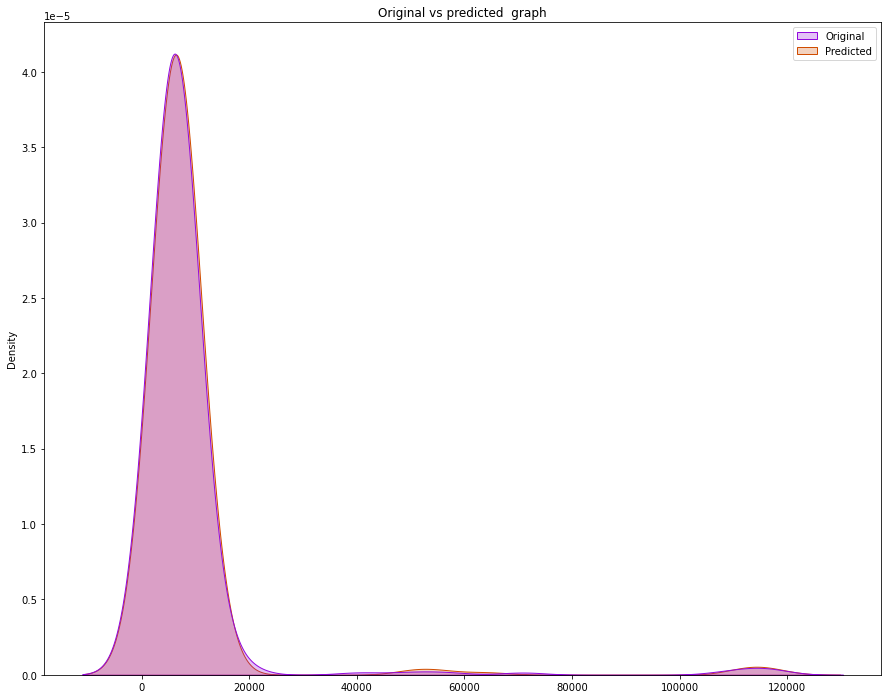

In [159]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=flight_price_prediction, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

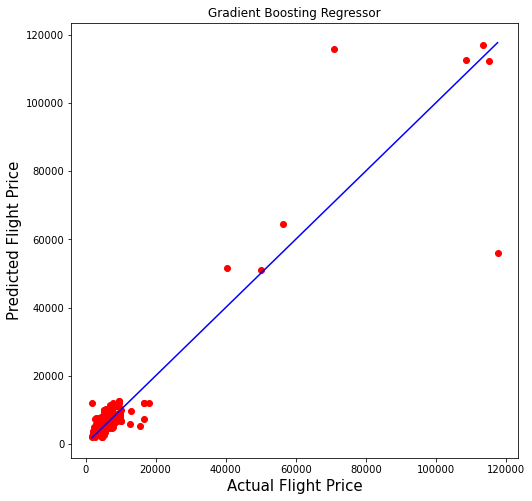

In [160]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predict,c='r')
plt1 = max(max(predict),max(y_test))
plt2 = min(min(predict),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Flight Price',fontsize=15)
plt.ylabel('Predicted Flight Price',fontsize=15)
plt.title("Gradient Boosting Regressor")
plt.show()

### Saving the model in CSV format

In [161]:
model =flight_price_prediction.to_csv('flight_price_prediction.csv')
model